Importing Libraries

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chronic-kidney-disease/kidney_disease_train.csv
/kaggle/input/chronic-kidney-disease/kidney_disease_test.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import io
import warnings
warnings.filterwarnings("ignore")

Importing the required Dataset

# Objective
The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. Use machine learning techniques to predict if a patient is suffering from a chronic kidney disease or not.

In [4]:
#Uploading dataset
df = pd.read_csv('/kaggle/input/chronic-kidney-disease/kidney_disease_train.csv')

In [5]:

#Getting a overview of DataFrame
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [6]:
df.shape

(280, 26)

 We can see that our dataset has 280 observations and 26 columns

In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

26 Columns

Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)

    Age(numerical) - age in years
    Blood Pressure(numerical) - bp in mm/Hg
    Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)
    Albumin(nominal) - al - (0,1,2,3,4,5)
    Sugar(nominal) - su - (0,1,2,3,4,5)
    Red Blood Cells(nominal) - rbc - (normal,abnormal)
    Pus Cell (nominal) - pc - (normal,abnormal)
    Pus Cell clumps(nominal) - pcc - (present,notpresent)
    Bacteria(nominal) - ba - (present,notpresent)
    Blood Glucose Random(numerical) - bgr in mgs/dl
    Blood Urea(numerical) -bu in mgs/dl
    Serum Creatinine(numerical) - sc in mgs/dl
    Sodium(numerical) - sod in mEq/L
    Potassium(numerical) - pot in mEq/L
    Hemoglobin(numerical) - hemo in gms
    Packed Cell Volume(numerical)
    White Blood Cell Count(numerical) - wc in cells/cumm
    Red Blood Cell Count(numerical) - rc in millions/cmm
    Hypertension(nominal) - htn - (yes,no)
    Diabetes Mellitus(nominal) - dm - (yes,no)
    Coronary Artery Disease(nominal) - cad - (yes,no)
    Appetite(nominal) - appet - (good,poor)
    Pedal Edema(nominal) - pe - (yes,no)
    Anemia(nominal) - ane - (yes,no)
    Class (nominal)- class - (ckd,notckd)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

We can see that our columns have **missing values**. 
**Classification** is our target variable.
We have **integer, float** as our numeric columns - They can store **continuous numeric, discrete numeric** and also **categorical variables**.
We also have **object columns** that store string values. They are majorly used to store categorical variables or character values.

We have a column **id with no missing values**. It can be a auto increment or unique identifier column. We will confirm this based on your future findings.

Two columns - **rc and wc** in cloumn list were numeric, but above they are taking object type. We need to check more into it.

In [9]:
df.shape

(280, 26)

In [10]:
# Percentage of missing values
(df.isnull().sum()/df.shape[0])*100

id                 0.000000
age                1.785714
bp                 3.214286
sg                12.857143
al                12.500000
su                13.571429
rbc               38.214286
pc                17.857143
pcc                1.428571
ba                 1.428571
bgr               11.785714
bu                 5.000000
sc                 4.285714
sod               23.928571
pot               24.285714
hemo              13.928571
pcv               18.214286
wc                27.500000
rc                33.214286
htn                0.357143
dm                 0.357143
cad                0.357143
appet              0.000000
pe                 0.000000
ane                0.000000
classification     0.000000
dtype: float64

Observations:
 1. Some columns have **no missing values**
 2. Columns l**ike - age, pcc, ba, bu, sc, htn, dm, cad, bp. They have less than 5% data as missing**. So we can subsitute them with **mean/median/mode** or it would be better if we find some **systematic mechaism** to relate to these missing values.
 3. Other variables have **high missing values**. So here we need to be **sure why they are missing and what is best way to handle them**. Otherwise it can create biasness in our data if we miss the underlying logic of missing values.
 4. Missing values are as high as - 38% and as low as 0.3%. Varing range of missing values. It needs to be paid more attaention.
 5. We should be also **confirm the column significance** to understand its importance - to decide to drop or how to impute its missing values and Outliers.
 6. **Distribution of the Feature**s will play a important factor in the way we will impute it.

In [11]:
# checking if any row has all missing values
df[df.isnull().all(1)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


We can also see no Row has all values as missing , so we cannot drop any row.

In [12]:
# Checking count of row with missing values for columns
df.isnull().sum(1).value_counts()

0     107
3      29
5      28
1      26
4      23
2      23
7      14
9       9
6       7
8       6
11      5
10      3
dtype: int64

- **No row with all missing values**.
- We have **3 rows that have 10 variables missing. And 5 rows with 11 variables missing.**
- **6 rows with 8 variables missing**. We need to decide how to handle them, understand if they can provide any important information of variable. 
- We can **drop them** if they do not in any way provide useful information and **do not improve computational efficiency and predictive power** of model.




In [13]:
# Statistical Parameters for Columnn
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
count,280.000000,275.000000,271.000000,244.000000,245.000000,242.000000,247.000000,266.000000,268.000000,213.000000,212.000000,241.000000,229.000000
mean,202.928571,51.454545,76.051661,1.017439,1.024490,0.438017,150.186235,56.983835,3.006157,137.255869,4.754245,12.531535,39.165939
std,111.988168,17.476176,14.256289,0.005746,1.375805,1.073193,77.357144,51.456635,5.850085,11.677123,3.826341,2.882635,8.774388
min,1.000000,2.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,4.500000,2.700000,3.100000,9.000000
25%,110.500000,42.000000,70.000000,1.010000,0.000000,0.000000,100.000000,27.250000,0.900000,135.000000,3.900000,10.500000,33.000000
50%,202.000000,55.000000,70.000000,1.020000,0.000000,0.000000,124.000000,41.000000,1.300000,138.000000,4.400000,12.700000,41.000000
75%,302.250000,65.000000,80.000000,1.020000,2.000000,0.000000,171.500000,64.750000,2.800000,141.000000,4.900000,14.900000,46.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


By seeing the above table, we can conclude:
 1. We have **13 numeric **variables
 2. Same conclusion as above - all columns except id have missing values
 3. Id column - We assumed it to be a unique identifier, but the number should be lying between 0 to 280 which is not the case as it max value is 399. So we need to go more deeper into it to understand what it is actually.
 4. Age column - **Min age is 2 and max is 90. Min age of 2 shows a interesting case of chronic kidney disease** which usually should not have been a case.
 5. bp - ranges from 50 to 180. So we can conclude that there are **cases of high and low blood pressure**
 6. sg - It is a discrete numerical variable
 7. al - It can take values from 0 to 5. However we see most of the people **75% have al value of 0,1 or 2, which is interesting**. It will be interesting to see how the low or high values of al relate to Kidney disease
 8. su - Again, **75% people have sugar level of 0 which indicated that most of the people have low sugar** or it can be a data capturing error
 9. bgr - has a high std dev of 70
 10. bu - With a max value of 390, it will be having outiers
 11. sc - **most of the values are lowas 3, but the max value of 76 needs to be investigated**
 12. sod - seems to be **normally distributed**
 13. pot - most of the values are low, but the max value of 47 needs to be investigated
 14. hemo and pcv - looks rather symmetric
 
 We can coclude that features - **bgr, su, bp, bu, sc, sod, al have an asymmetric dstribution and are skewed. Their mean and median values do not overlap and we should be aware about existence of outliers and central tendency of such variables.**

In [14]:
# Object type describe
df.describe(include = 'O')

,rbc,pc,pcc,ba,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,173,230,276,276,203,187,279,279,279,280,280,280,280
unique,2,2,2,2,78,48,2,4,3,2,2,2,2
top,normal,normal,notpresent,notpresent,6700,5.2,no,no,no,good,no,no,ckd
freq,144,181,250,260,8,10,177,175,254,218,229,240,174


Observations: **To check the unique and how many categories**
 1. We have **13 Categorical variables**
 2. rbc - many missing values. 2 unique values
 3. pc - 2 unique values, with normal dominating
 4. **pcc, ba - 2 unique values, with notpresent occuring 90% of times**. These two can be related also
 5. **wc, rc - It is a discrete numerical variable.** It indicates count of white and red blood cell. It is wrongly characterised as object rather it should be a numeric (int) variables. It could also point to some unusal character occurence in the variable as they are read as object.
 6. htn - 2 unique vales
 7. dm, cad - **Have 4 and 3 unique values, rather as per dictionary it should be haveing only yes or no.**
 8. appet, pe, ane - nothing unusual
 9. classification - Target variable. It seems rather **balanced** with 2 unique values.


Having gained knowledge of the variables. We should try to gain more insight of the variables to **reach some conclusion and remove some biases**. Therfore, the next logical step is **Exploratory Data Anlysis.**

We will start with Univariate Analysis.
TO make the process more organised, I will be dividing the data set into numeric and categorical variables.

In [15]:
# Dividing into numeric and categorical variables
df_cont = df.select_dtypes(exclude = 'object')
df_cat = df.select_dtypes(include = 'object')

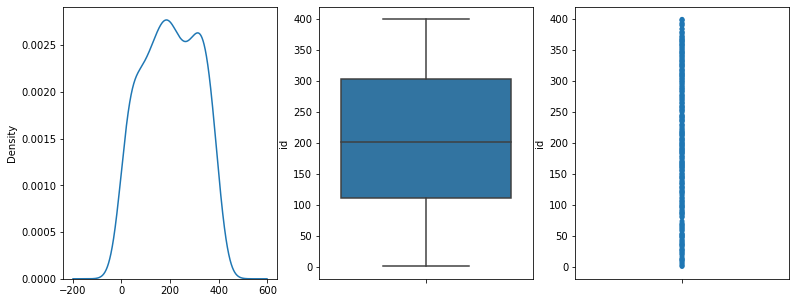

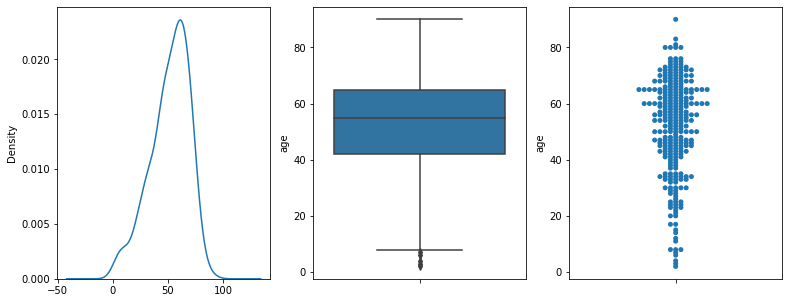

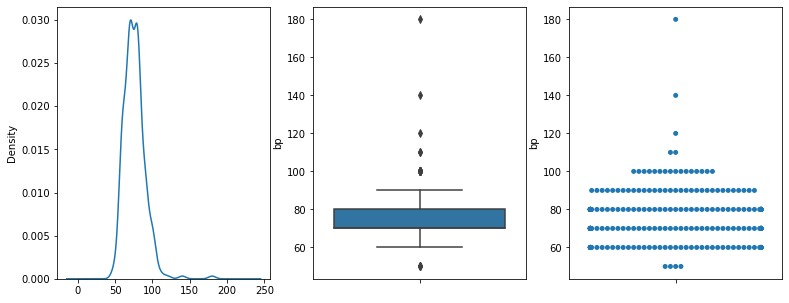

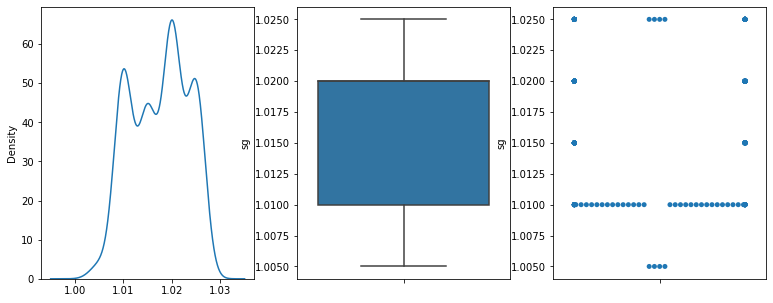

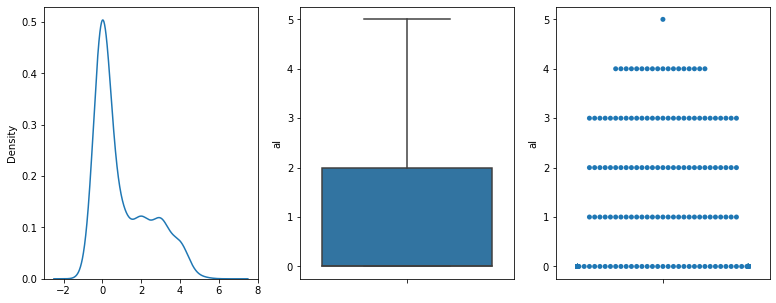

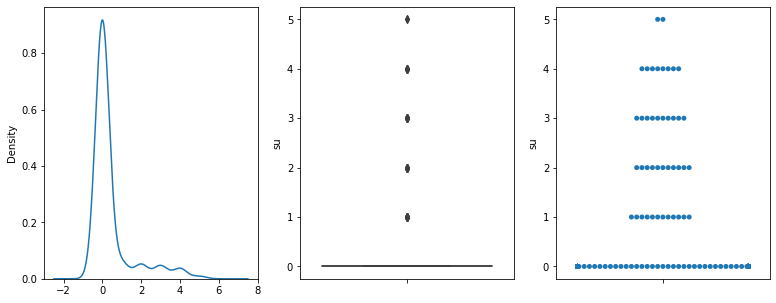

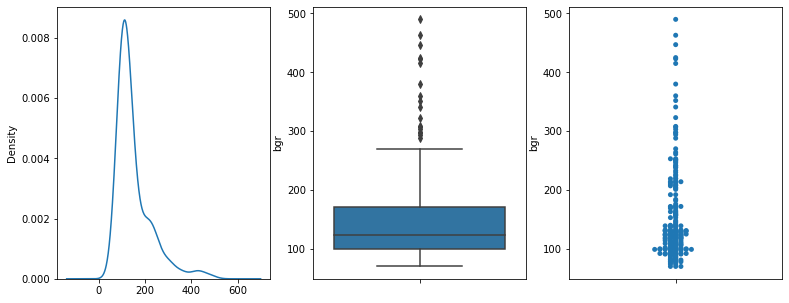

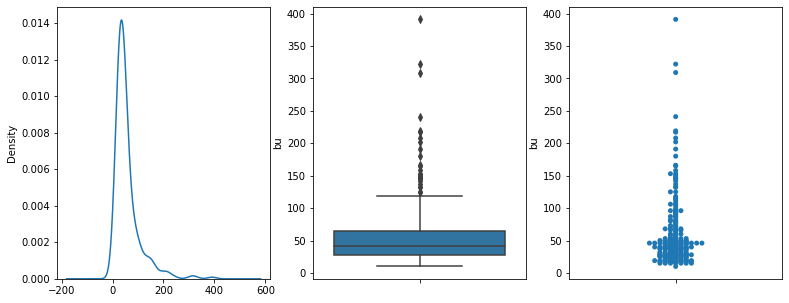

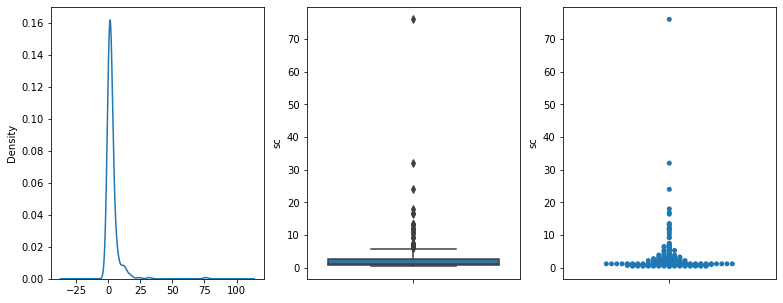

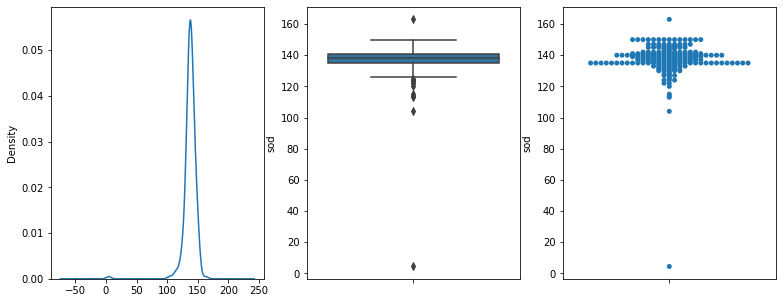

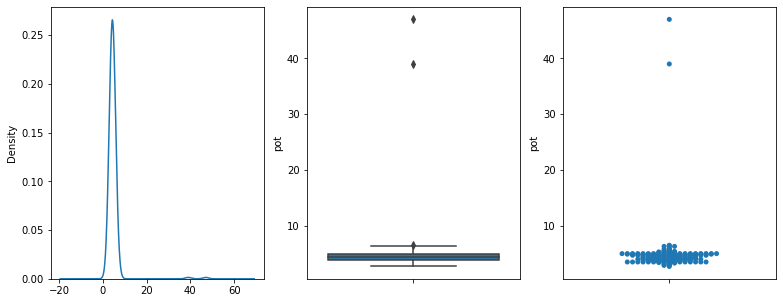

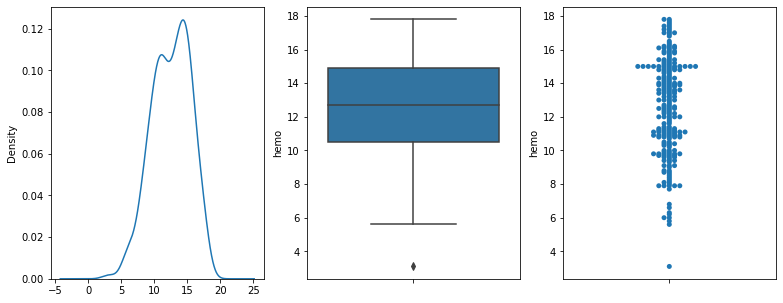

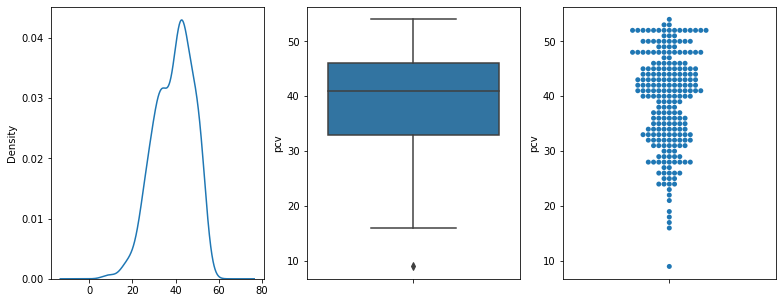

In [16]:
# EDA Numeric Variable
for col in df_cont.columns:
  fig, ax = plt.subplots(1,3, figsize = (13,5))
  df[col].plot(kind = 'kde', ax = ax[0])
  ax[0].set_ylim(bottom = 0)
  sns.boxplot(col, data = df_cont, ax = ax[1], orient = 'v')
  sns.swarmplot(col, data = df_cont, ax = ax[2], orient = 'v')

Approach : We try to study the distribution of our variables using the kde plot, box plot and Swarmplot.
**Kde plot** - can provide idea of **distribution** of variable. Concentration of data. Shape of distribution
**Boxplot** - It helps to understand the **median, the Quantiles and Outliers**
**SwarmPlot** - Gives an **actual idea of values taken by the variable. It help us to quantify distribution observations.**

Observations:
 1. Id -  Symmetric Distribution, No outliers and takes value across all of its range.
 2. Age - It is slightly **left skewed with high concentration of data between 40-60**. There are few outliers on the lower spectrum of age
 3. Bp - It has a long right tail that indicates presence of outliers as confirmed by Boxplot. **One interesting observation is that bp is taking discrete values only.**
 4. sg, al - as observed earlier also they are discrete variables. Tend to concentrate values on the lower end.
 5. **su - most of the values are 0**. It has outliers but we should not see them as outliers as they are actually true value. Due to a skewed distriibution, it is showing presence of outliers.
 6. bgr - Right skewed, Outliers. Concentrated between 0-150.
 7. bu - Right skewed, Outliers. Concentrated between 0-50.
 8. **sc - Concentrated between 0-8. We need to see why some values are so high for this variables.**
 9. sod - A left tail, Interesting. Has Outliers with very low value near 0 - which can be a error or a severe deficinecy of sodium.
 10. Pot - Few outliers
 11. Hemo, pcv - Both are little left skewed with a distribution close to normal.

**Mostly all the variables have outliers ranging from few to many.**
 

In [17]:
# Seeing values of id column
df_cont['id'].sort_values(ascending = True)

217      1
108      2
160      4
30       6
187      8
      ... 
107    392
235    393
245    397
39     398
272    399
Name: id, Length: 280, dtype: int64

Id column is some form of **numeric identifier**. It **does not provide any qualitative information**. So I have decided to drop it and no further analysis will be done related to this variable.

In [18]:
#Unique values of age
np.sort(df_cont['age'].unique())

array([ 2.,  3.,  4.,  6.,  7.,  8., 11., 12., 14., 15., 17., 20., 21.,
       22., 23., 24., 25., 26., 27., 28., 29., 30., 32., 33., 34., 35.,
       37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.,
       50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
       63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.,
       76., 80., 81., 83., 90., nan])

In [19]:
# Dataset with age less than 11
df[df['age'] < 11]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
33,150,8.0,60.0,1.025,3.0,0.0,normal,normal,notpresent,notpresent,...,41.0,6700,NaN,no,no,no,poor,yes,no,ckd
89,185,4.0,NaN,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,34.0,\t?,NaN,no,no,no,good,no,no,ckd
139,186,8.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
169,215,2.0,NaN,1.010,3.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
212,190,6.0,60.0,1.010,4.0,0.0,abnormal,abnormal,notpresent,present,...,30.0,16700,4.8,no,no,no,poor,no,no,ckd
217,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
246,187,3.0,NaN,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,34.0,12300,NaN,no,no,no,good,no,no,ckd
274,188,8.0,NaN,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,38.0,NaN,NaN,no,\tno,no,good,no,no,ckd


We can see that people with age **less than 11 are also suffering from chronic Disease.** 
Also Age does not have any value which can be an error other than Nan. So we **should not treat the Outliers for this variable **and fill the missing values with Median or other imputation technique, if we are able to relate the column with some other variable (which is not the case till now)

Checking Unique value counts of various discrete Variables to understand their distribution

In [20]:
# Unique values of bp
df['bp'].value_counts()

80.0     81
70.0     81
60.0     52
90.0     32
100.0    16
50.0      4
110.0     2
180.0     1
140.0     1
120.0     1
Name: bp, dtype: int64

In [21]:
# Unique values of sg
df['sg'].value_counts(dropna = False)

1.020    74
1.010    61
1.025    57
1.015    48
NaN      36
1.005     4
Name: sg, dtype: int64

In [22]:
# Unique value of al - Aluminium
df['al'].value_counts(dropna = False)

0.0    139
NaN     35
1.0     29
2.0     29
3.0     29
4.0     18
5.0      1
Name: al, dtype: int64

In [23]:
# Checking rows that have both al and sg missing
df[(df['al'].isnull()) & (df['sg'].isnull())].count()

id                33
age               32
bp                32
sg                 0
al                 0
su                 0
rbc                1
pc                 1
pcc               33
ba                33
bgr               29
bu                33
sc                33
sod               26
pot               25
hemo              27
pcv               20
wc                15
rc                14
htn               33
dm                33
cad               33
appet             33
pe                33
ane               33
classification    33
dtype: int64

We can see that su, al, sg have around 35 missing values and there are **33 indexes where all three have missing values.** This is interesting. **Also Rbc and pc are also missing in such indexes. **

In [24]:
# Overview of dataset for missing value of sg and al 
df_sg = df[(df['al'].isnull()) & (df['sg'].isnull())]
df_sg

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
9,245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,19.0,7200,2.6,yes,no,yes,poor,no,no,ckd
26,59,59.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
37,81,45.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,29.0,5500,3.7,yes,yes,no,good,no,no,ckd
41,208,67.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,41.0,6900,4.9,yes,yes,no,good,no,yes,ckd
49,228,60.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,no,ckd
57,238,72.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
60,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28.0,6900,2.5,yes,yes,no,poor,no,yes,ckd
62,122,34.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,yes,ckd


By seeing the dataset, **we could not confirm** if the missing value belong to particular age group, showing some particular characterstics in term of other variables. 

One interesting observation is that for the missing value of the 5 columns , **pcc and ba take only non present values**. But the **non present value dominate for these variables as can be confirmed from above describe statistics**.

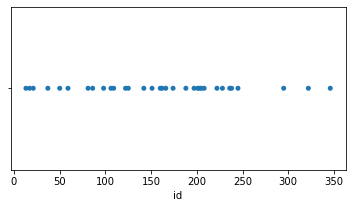

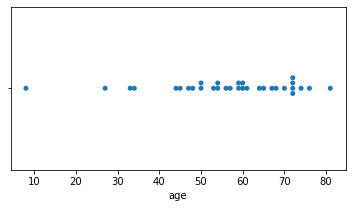

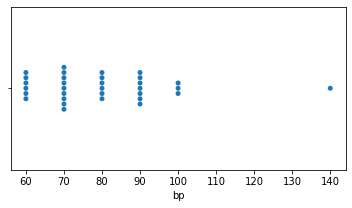

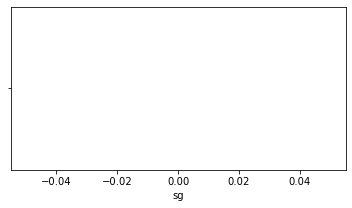

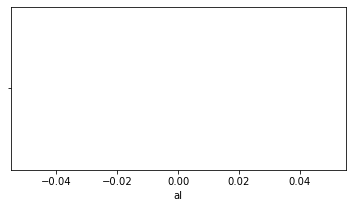

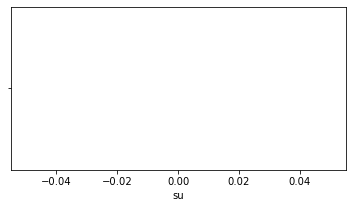

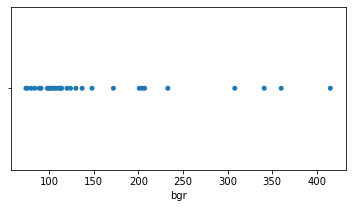

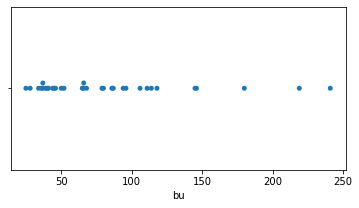

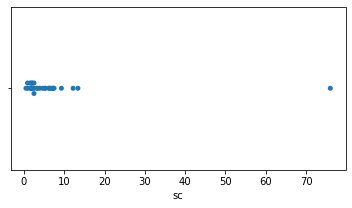

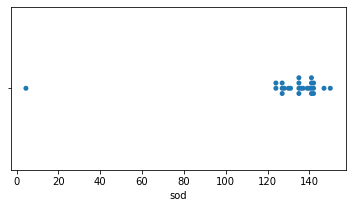

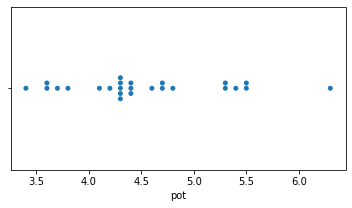

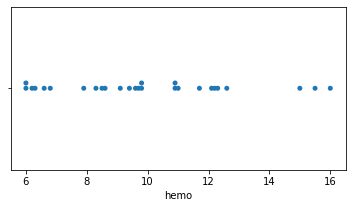

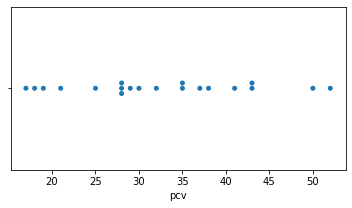

In [25]:
# Trying to see the values of other variables for the missing values of column sg and al,
# to understand if we can relate the variables somehow and this can help in missing value 
# imputation
for col in df_sg.columns:
  if df_sg[col].dtypes != 'object':
    fig, ax = plt.subplots(1,1, figsize =(6,3))
    sns.swarmplot(col, data = df_sg)

We are **not able to find relation** with any other columns of the missing values of the 5 columns that are considered above - sg, al, rbc, su, pc. We will try to impute them suitably. But it would be better to also make **a column to indicate the missing values of these 5 columns** - as they overlap and such a **column can capture the missingness of these 5 variables** in one go.

In [26]:
# Checking the value count for Sugar(su)
df.su.value_counts(dropna = False)

0.0    199
NaN     38
1.0     12
2.0     11
3.0     10
4.0      8
5.0      2
Name: su, dtype: int64

**0** is the most common occurence. SO the **imputation** can be done using it.

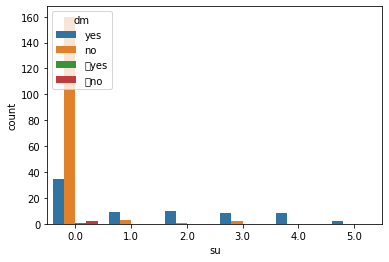

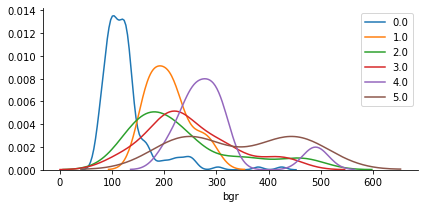

In [27]:

sns.countplot(x = 'su', hue = 'dm', data = df)
g = sns.FacetGrid(data = df, hue = 'su', aspect = 2)
g.map(sns.kdeplot, 'bgr')
plt.legend()

Text(0.5, 1.0, 'bu')

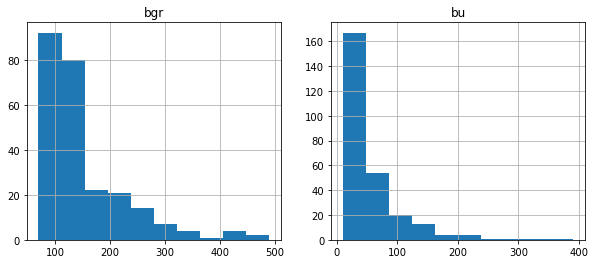

In [28]:
# Checking the values of the columns Blood Glocuse random(bgr) and Blood Urea(bu)
fig = plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
df.bgr.hist()
plt.title('bgr')
plt.subplot(1,2,2)
df.bu.hist()
plt.title('bu')

The two have kind of **same distribution**. This can **point towards correlation**, which we will check for later using correlation matrix.

Both the variable also are **right skewed**. They also have long tails which point to **high Kurtosis** - pointing to existence of Outliers. 

In [29]:
#Checking for high values of bgr (abnormality)
df[df['bgr']> 400]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
34,10,50.0,60.0,1.010,2.0,4.0,NaN,abnormal,present,notpresent,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
64,67,45.0,80.0,1.020,3.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
73,86,56.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
108,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
131,244,64.0,90.0,1.015,3.0,2.0,NaN,abnormal,present,notpresent,...,40.0,9800,4.6,yes,yes,no,good,no,yes,ckd
144,170,66.0,70.0,1.015,2.0,5.0,NaN,normal,notpresent,notpresent,...,33.0,9600,4.4,yes,yes,no,good,no,no,ckd


We can see that some values have very high values of Blood glucose range which is abnormal. As **bgr > 200 tends to indicate diabetis** and we can also see all these cases are of chronic kidney disease.
So it would not be advisable to consider them as errorneous values and drop them. **They are outliers but do provide valuable information**

In [30]:
# Checking for abnormal high values of bu
df[df.bu > 200]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
11,145,57.0,90.0,1.015,5.0,0.0,abnormal,abnormal,notpresent,present,...,24.0,4200,3.3,yes,yes,yes,poor,yes,yes,ckd
36,103,76.0,70.0,1.015,2.0,0.0,normal,abnormal,present,notpresent,...,36.0,12700,4.2,yes,no,no,poor,yes,yes,ckd
57,238,72.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
62,122,34.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,yes,ckd
128,249,56.0,90.0,1.010,4.0,1.0,normal,abnormal,present,notpresent,...,9.0,5400,2.1,yes,yes,no,poor,yes,yes,ckd
170,61,67.0,80.0,1.010,1.0,3.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
210,43,35.0,80.0,1.010,1.0,0.0,abnormal,NaN,notpresent,notpresent,...,24.0,7900,3.1,no,yes,no,good,no,no,ckd
263,130,50.0,90.0,1.010,2.0,0.0,normal,abnormal,present,present,...,22.0,16300,2.7,no,no,no,poor,yes,yes,ckd


Same as above the **high values indicate ckd** presence. We would need to **check** if this indicates a relation between bu and Chronic kidney Disease or just some one off observations.

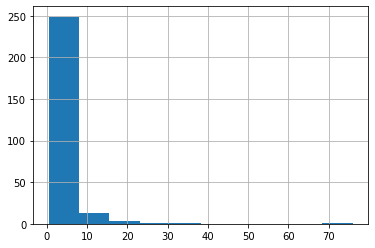

In [31]:
# Generating insights using Serum Creatinine(sc)
df.sc.hist()

The normal range for creatinine in the blood may be 0.84 to 1.21 milligrams per deciliter(Mayo Clinic). 
**Higher than that it indicates kidney malfunction**. So it can be a big indicator for classification problem. We could confirm it in a better way by visualizing the relation between two latter.

Also the very far off value for SC certainly point to very **abnormal Outliers** which needs domain knowledge to be dealt properly.

Text(0.5, 1.0, 'Hemoglobin')

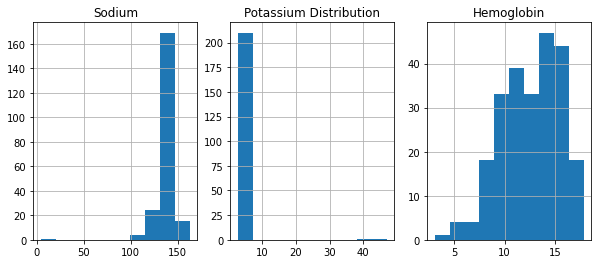

In [32]:
# Understanding Potassimum(pot), Sodium(sod), Hemoglobin(hemo) data structure more closely
fig, ax = plt.subplots(1,3, figsize = (10,4))
df.sod.hist(ax = ax[0])
ax[0].set_title('Sodium')
df.pot.hist(ax = ax[1])
ax[1].set_title('Potassium Distribution')
df.hemo.hist(ax = ax[2])
ax[2].set_title('Hemoglobin')

- We can see **abnormal values of 0** in sodium values which should not be a case. 
- We can also see some **abnormal values of Potassium around 40.**
- Hemoglobin has a slight left skewness but overall we can see a **normal distribution**.
- Hemoglobin has normal values genrally in range of 11 to 17. So we can also **need to see of the lower values of hemoglobin point to something**.

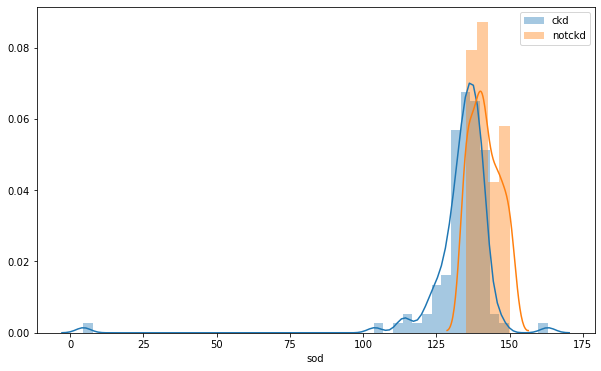

In [33]:
#Checking abnormality of sodium and instances of ckd
ckd = list(df.classification.unique())
plt.figure(figsize = (10,6))
for c in ckd:
  sns.distplot(df['sod'][df['classification'] == c], label = c)
  plt.legend()

Both lower than 130 and higher than 160 values lead to ckd

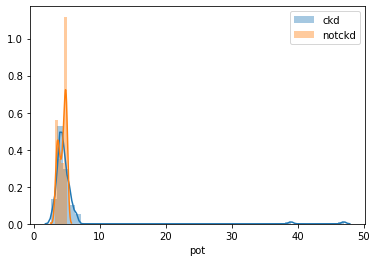

In [34]:
# Abnormality of Potassium and ckd
plt.figure(figsize = (6,4))
for c in ckd:
  sns.distplot(df['pot'][df['classification'] == c], label = c)
  plt.legend()

**Abnormality in pot points to ckd.**

In [35]:
# Checking the dataset for abnormal values of Sodium and Potassium
df[(df.sod < 50) | (df.pot > 10)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
170,61,67.0,80.0,1.010,1.0,3.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
186,128,52.0,90.0,1.015,4.0,3.0,normal,abnormal,notpresent,notpresent,...,23.0,5000,2.9,yes,yes,no,good,no,yes,ckd
253,21,60.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,32.0,6200,3.6,yes,yes,yes,good,no,no,ckd


All these value are very abnormal and show us presence of ckd. We can treat these outliers to more probable values or we can drop the rows. 
We also need to confirm if this point to a pattern or just a random chance.

Text(0.5, 1.0, 'pcv')

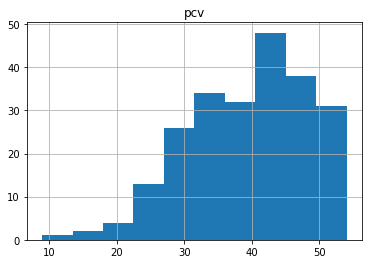

In [36]:
# Distribution of Pcked Cell Volume(Pcv)
df_cont.pcv.hist()
plt.title('pcv')

 ## CATEGORICAL VARIABLES

In [37]:
df_cat.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

Pasting Column Meaning again just for Quick References

Age(numerical) - age in years
Blood Pressure(numerical) - bp in mm/Hg
Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)
Albumin(nominal) - al - (0,1,2,3,4,5)
Sugar(nominal) - su - (0,1,2,3,4,5)
Red Blood Cells(nominal) - rbc - (normal,abnormal)
Pus Cell (nominal) - pc - (normal,abnormal)
Pus Cell clumps(nominal) - pcc - (present,notpresent)
Bacteria(nominal) - ba - (present,notpresent)
Blood Glucose Random(numerical) - bgr in mgs/dl
Blood Urea(numerical) -bu in mgs/dl
Serum Creatinine(numerical) - sc in mgs/dl
Sodium(numerical) - sod in mEq/L
Potassium(numerical) - pot in mEq/L
Hemoglobin(numerical) - hemo in gms
Packed Cell Volume(numerical)
White Blood Cell Count(numerical) - wc in cells/cumm
Red Blood Cell Count(numerical) - rc in millions/cmm
Hypertension(nominal) - htn - (yes,no)
Diabetes Mellitus(nominal) - dm - (yes,no)
Coronary Artery Disease(nominal) - cad - (yes,no)
Appetite(nominal) - appet - (good,poor)
Pedal Edema(nominal) - pe - (yes,no)
Anemia(nominal) - ane - (yes,no)
Class (nominal)- class - (ckd,notckd)
  
  



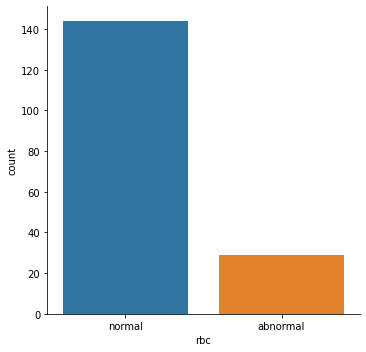

In [38]:
# Count plot of Categorical Varables
sns.catplot(x = 'rbc', estimator = None, data = df_cat, kind = 'count')

Conclusion: 
- Lots of missing value in the variable.
- **Imbalanced** towards normal
- If we **impute this variable with mode then it can cause loss of predictive power of the feature, as it will become highly imbalanced**.
- It would be better if we can derive missing values accurately in some way or even think about creating a **new category - 'Other'** to understand the missing values importance.
- **Red Blood count can have a relationship with hemoglobin** as Hemoglobin is carried by Red blood cells. So we can visual this relation to undertand if our data has such relation and this will also help us in Feature Engineering and Imputations.

In [39]:
# creating list of categories of rbc
label = list(x for x in df['rbc'].unique())
label.remove(np.nan)
label

['normal', 'abnormal']

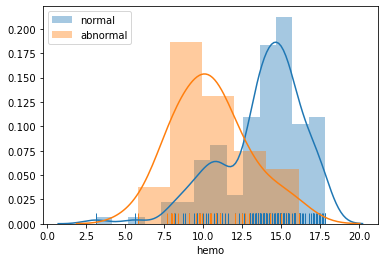

In [40]:
# Plotting different categories of rbc with hemoglobin
for z in label:
  subset = df['hemo'][df['rbc'] == z]
  sns.distplot(a = subset, label = label, rug = True)
  plt.legend(['normal','abnormal'])

The distribution do over lap in the middle but have **quite good separation. This can help us in imputation.** We can consider 12.5 as the point of separation for the two rbc categories.

(Source: Mayo Clinic)
The normal range for hemoglobin is:

    For men, 13.5 to 17.5 grams per deciliter
    For women, 12.0 to 15.5 grams per deciliter


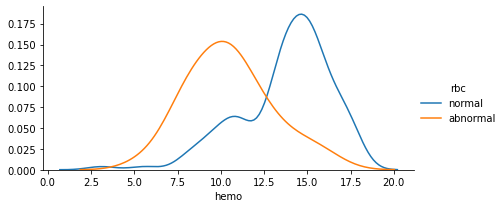

In [41]:
# Just the above same plot in a different manner to remember. Please ignore
grid = sns.FacetGrid(df, hue="rbc", aspect = 2)
grid.map(sns.kdeplot, 'hemo')
grid.add_legend()

Text(0.5, 1.0, 'Pus Cells Clump')

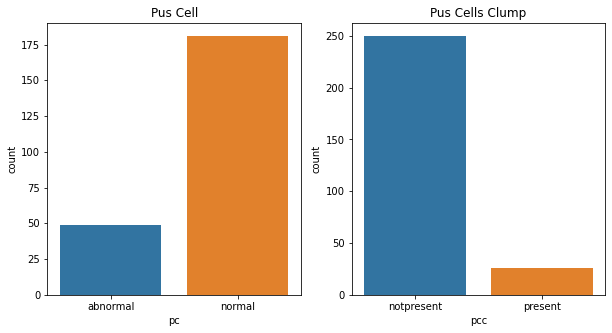

In [42]:
#Distirbution of Pus cell and Pus cells clump
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'pc', data = df_cat)
plt.title('Pus Cell')
plt.subplot(1,2,2)
sns.countplot(x = 'pcc', data = df_cat)
plt.title('Pus Cells Clump')

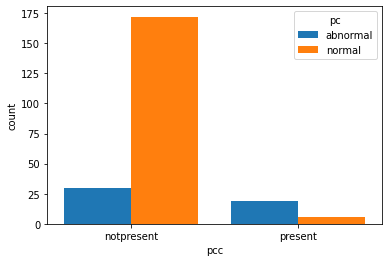

In [43]:
#Check overlap
sns.countplot(x = 'pcc', hue = 'pc', data = df_cat, saturation = 1)

We can see that **Pcc not present has high overlap with Normal PC** (which we assumed), and PCC present has high overlap with abnormal pcc.

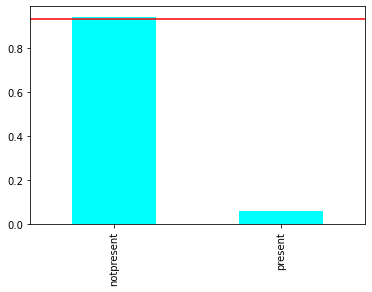

In [44]:
# Proportion of Bacteria present or not
df_cat.ba.value_counts(normalize = True).plot(kind = 'bar', colormap = 'cool')
plt.axhline(y = 0.93, color = 'r', label = '0.93')

About **93 percent value**s belong to only one variable present. This indicates a very imbalanced sample which is not very strong in terms of predictive power.

**rc and wc are numerical** variable with String values in it. So we should **visualise it as a continuous variable.**

In [45]:
# Provide us the non integer values in the numeric column
s = df.rc.apply(lambda x : str(x).replace('.','').isdigit())
t = list(s[s == 0].index.values)
df.iloc[t,:].rc.unique()

array([nan, '\t?'], dtype=object)

In [46]:
#Missng counts
df.rc.isnull().sum()

93

Text(0.5, 1.0, 'RC Distribution')

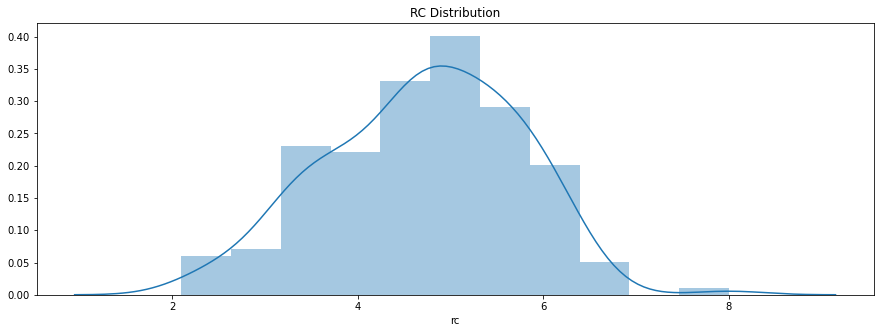

In [47]:
# Dropping the Nan and other non numeric values and seeing distribution
plt.figure(figsize = (15,5))
sns.distplot(df['rc'][(df['rc'] != '\t?') & (~df['rc'].isnull())])
plt.title('RC Distribution')

In [48]:
df['rc'] = df['rc'].replace({'\t?' : np.nan})
df['wc'] = df['wc'].replace({'\t?' : np.nan , '\t8400' : 8400})

In [49]:
df.rc.isnull().sum()
df.wc.isnull().sum()

78

A neat **Gaussian Distribution**. We need to **take special care in the imputation of this variable** - as it has a large number of missing values, so simple imputation can really bring biasness in its distribution

We can also see the distribution of the variable with rbc - normal or abnormal. This can help us in analysing this feature more closely.

In [50]:
label = list(x for x in df['rbc'].unique())
label.remove(np.nan)
label

['normal', 'abnormal']

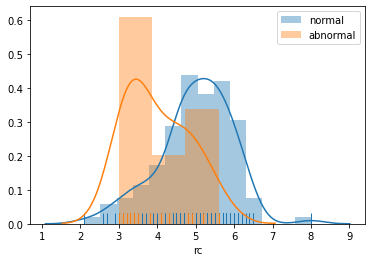

In [51]:
# Plotting different categories of rbc with rc - Count of Red blood cells
df_rc = df[(df['rc'] != '\t?') & (~df['rc'].isnull())]
for z in label:
  subset = df_rc['rc'][df['rbc'] == z]
  sns.distplot(a = subset, label = label, rug = True)
  plt.legend(('normal','abnormal'))

We can see the separation **between the two classes of rbc on the rc variables.**

In [52]:
# WC Analysis
# Provide us the non integer values in the numeric column
s = df.wc.apply(lambda x : str(x).isdigit())
t = list(s[s == 0].index.values)
df.iloc[t,:].wc.unique()

array([nan], dtype=object)

These values are not normal in the wc column. nan and \t we have to deal. \t8400 value could be 8400 simply as it falls in the scale of wc count.

Text(0.5, 1.0, 'WC Distribution')

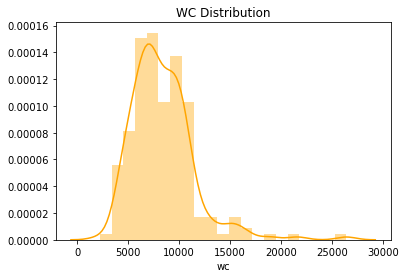

In [53]:
sns.distplot(df['wc'][(df['wc'] != '\t?') & (~df['wc'].isnull()) & (df['wc'] != '\t8400')], 
             color = 'Orange')
plt.title('WC Distribution')

It shows slight right skewed and also precense of Outliers. Though shape is near to Gaussian Curve

Text(0.5, 1.0, 'Coronary Artery Disease')

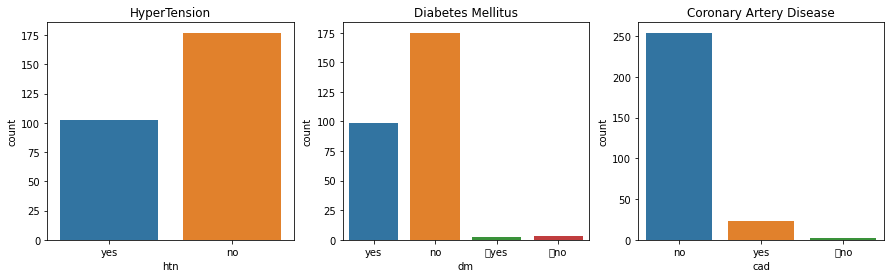

In [54]:
# Distribution of HyperTension and DM and CAD
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.countplot(x = 'htn', data = df_cat)
plt.title('HyperTension')
plt.subplot(1,3,2)
sns.countplot(x = 'dm', data = df_cat)
plt.title('Diabetes Mellitus')
plt.subplot(1,3,3)
sns.countplot(x = 'cad', data = df_cat)
plt.title('Coronary Artery Disease')



We have **4 column in Dm and 3 in Cad** , which should not be the case. But we can say that the error only are cases of yes and no as can be deduced from the suffixes of these categories.

The values are very less and will not much affect the distribution of the Variables.

There are more cases of 'no' Hypertension. We can see this distribution across age and some other factor to understand HyperTension cases.
DM also has more cases of no. And same goes for cad - very few people do actually have a coronary disease.

Correcting dm and cad values - as we are more or less sure on how to impute them

In [55]:
df.dm.value_counts()

no       175
yes       99
\tno       3
\tyes      2
Name: dm, dtype: int64

In [56]:
# Correcting the values of the variables dm and cad
df['dm'] = np.where(df.dm == '\tno', 'no', df['dm'])
df['dm'] = np.where(df.dm == '\tyes', 'yes', df['dm'])
df.dm.value_counts()

no     178
yes    101
Name: dm, dtype: int64

In [57]:
df.cad.value_counts()

no      254
yes      23
\tno      2
Name: cad, dtype: int64

In [58]:
# Correcting the values of the variables dm and cad
df['cad'] = np.where(df.cad == '\tno', 'no', df['cad'])
df.cad.value_counts()

no     256
yes     23
Name: cad, dtype: int64

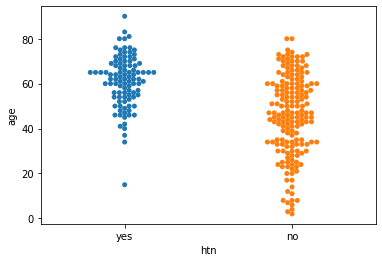

In [59]:
# See relation of HyperTension with age
sns.swarmplot(x = 'htn', y = 'age', data = df)

As thought most of the cases of Hypertension are in the age bracket above age > 40.

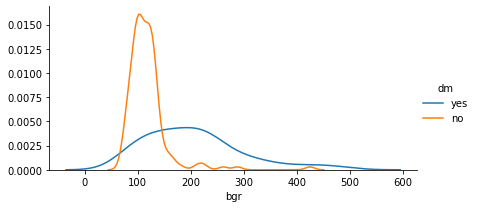

In [60]:
# Relation of dm with blood glucose variable can show some trend
g = sns.FacetGrid(df, hue = 'dm', aspect = 2)
g.map(sns.kdeplot, 'bgr')
g.add_legend()

We can see a **separation above 170 mark**. Most of the cases with dm as yes belong above 170. The cases of no dm are concentrated between **50 -170** , which can be taken as **normal bgr range**.

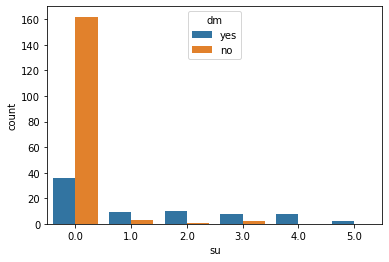

In [61]:
# Distribution of dm with su(sugar)

sns.countplot(x = 'su', hue = 'dm', data = df)

We can see that most of the no status of diabetes concur with 0 as sugar level. So we can conclude that above 0 , there are more chances of dm.

Text(0.5, 1.0, 'Anemia')

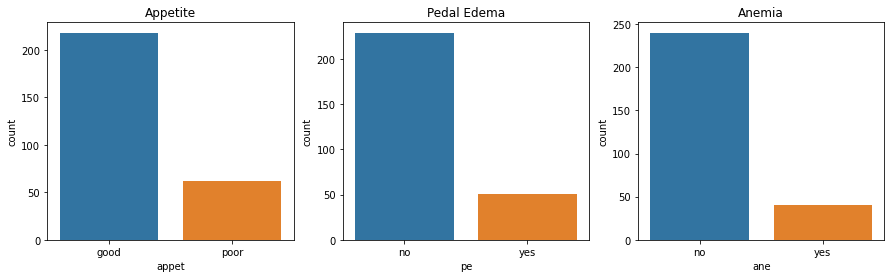

In [62]:
# Distribution of Appetite, Pedal Edema, Anemia

plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.countplot(x = 'appet', data = df_cat)
plt.title('Appetite')
plt.subplot(1,3,2)
sns.countplot(x = 'pe', data = df_cat)
plt.title('Pedal Edema')
plt.subplot(1,3,3)
sns.countplot(x = 'ane', data = df_cat)
plt.title('Anemia')

- Most of the people have a good appetite.
- Pedel Edema - indicates swolleness of our feet. This can be a direct indicator of kidney issues. 'No' as being the major status here also.
- Anemia - Indicates presence or absence of red blood cells/hemoglobin. Most of the people have 'no' anemia condition.

Text(0.5, 1.0, 'Anemia vs Hemo')

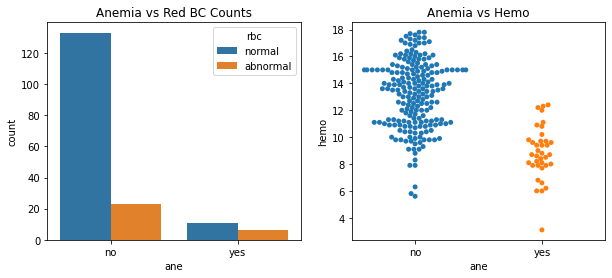

In [63]:
#Anemia relation with red blood cell counts and hemoglobin level
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.countplot(x = 'ane', hue = 'rbc', data = df)
plt.title('Anemia vs Red BC Counts')
plt.subplot(1,2,2)
sns.swarmplot(x = 'ane', y = 'hemo', data = df)
plt.title('Anemia vs Hemo')

 - From Amenia vs RBC - we can conclude that most of cases of **no anemia lies with normal rbc count** (as should be the case)
 - Anemia vs Hemo - **Below 10 -11 hemo level we have higher chances of being anemic**.(which should be the case)

Text(0.5, 1.0, 'Classification')

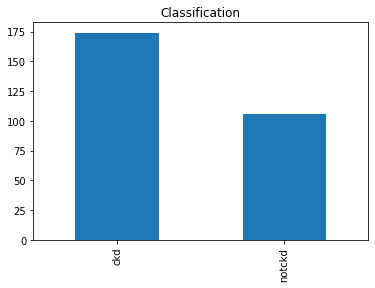

In [64]:
#Target variable distribution
df.classification.value_counts().plot(kind = 'bar')
plt.title('Classification')

More cases of chronic kidney diseases which is very **favourable** as it will help us in predicting ckd category more accurately.

# Bivariate Analysis

In [65]:
##Rectifying some variables to make Bivariate analysis better
df['rc'] = df['rc'].replace({'\t?' : np.nan})
df['wc'] = df['wc'].replace({'\t?' : np.nan , '\t8400' : 8400})

df['dm'] = np.where(df.dm == '\tno', 'no', df['dm'])
df['dm'] = np.where(df.dm == '\tyes', 'yes', df['dm'])
df.dm.value_counts()

# Correcting the values of the variables dm and cad
df['cad'] = np.where(df.cad == '\tno', 'no', df['cad'])
df.cad.value_counts()

df.rc = df.rc.astype(float)
df.wc = df.wc.astype(float)

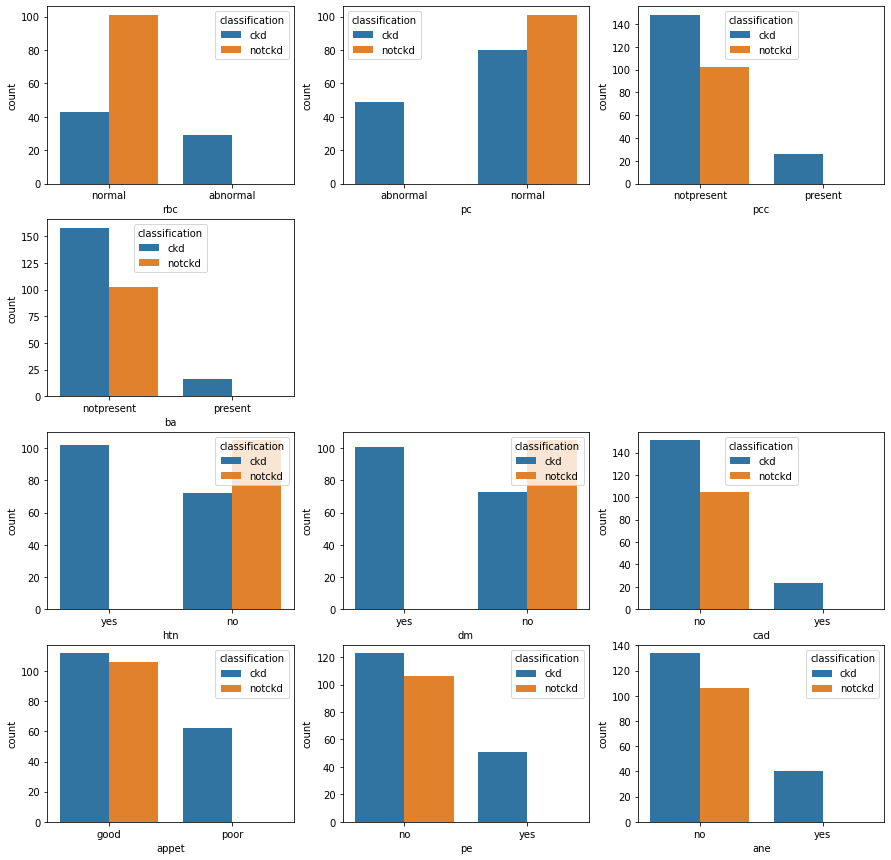

In [66]:
plt.figure(figsize = (15,15))
for col in df_cat.drop(['rc','wc','classification'], axis = 1).columns:
  plt.subplot(4,3,df_cat.columns.get_loc(col)+1)
  sns.countplot(col, hue = 'classification', data = df)


Observations:

- If rbc counts is normal then there are less chances of being ckd. But **rbc count abnormal can certainly lead to ckd**
- Same is the case of **Pus cell and Pus cell clump and Bacteria** - If there is normal puss cell, it has almost equal chance of being ckd or non ckd. But **presence of pc, ba, pcc do certainly point of occurence of ckd**. We can assume that pc, ba, pcc presence will be good predictor fot presence of ckd.
- **Presence of Hypertension(htn), diabetes(dm),  coronary artery disease, swollen feets(pe), amemia, poor appetitie leads to presence of ckd**. But absence of hypertension also can lead to ckd.
- From above analysis, we can see **that presence of even one** - abnormal red cell count, bacteria, hypertension, pus call, diabetes, coronary disease, lack of appetite, amenic, swllen body parts - **increases chances of occurence of ckd to substantial level**.

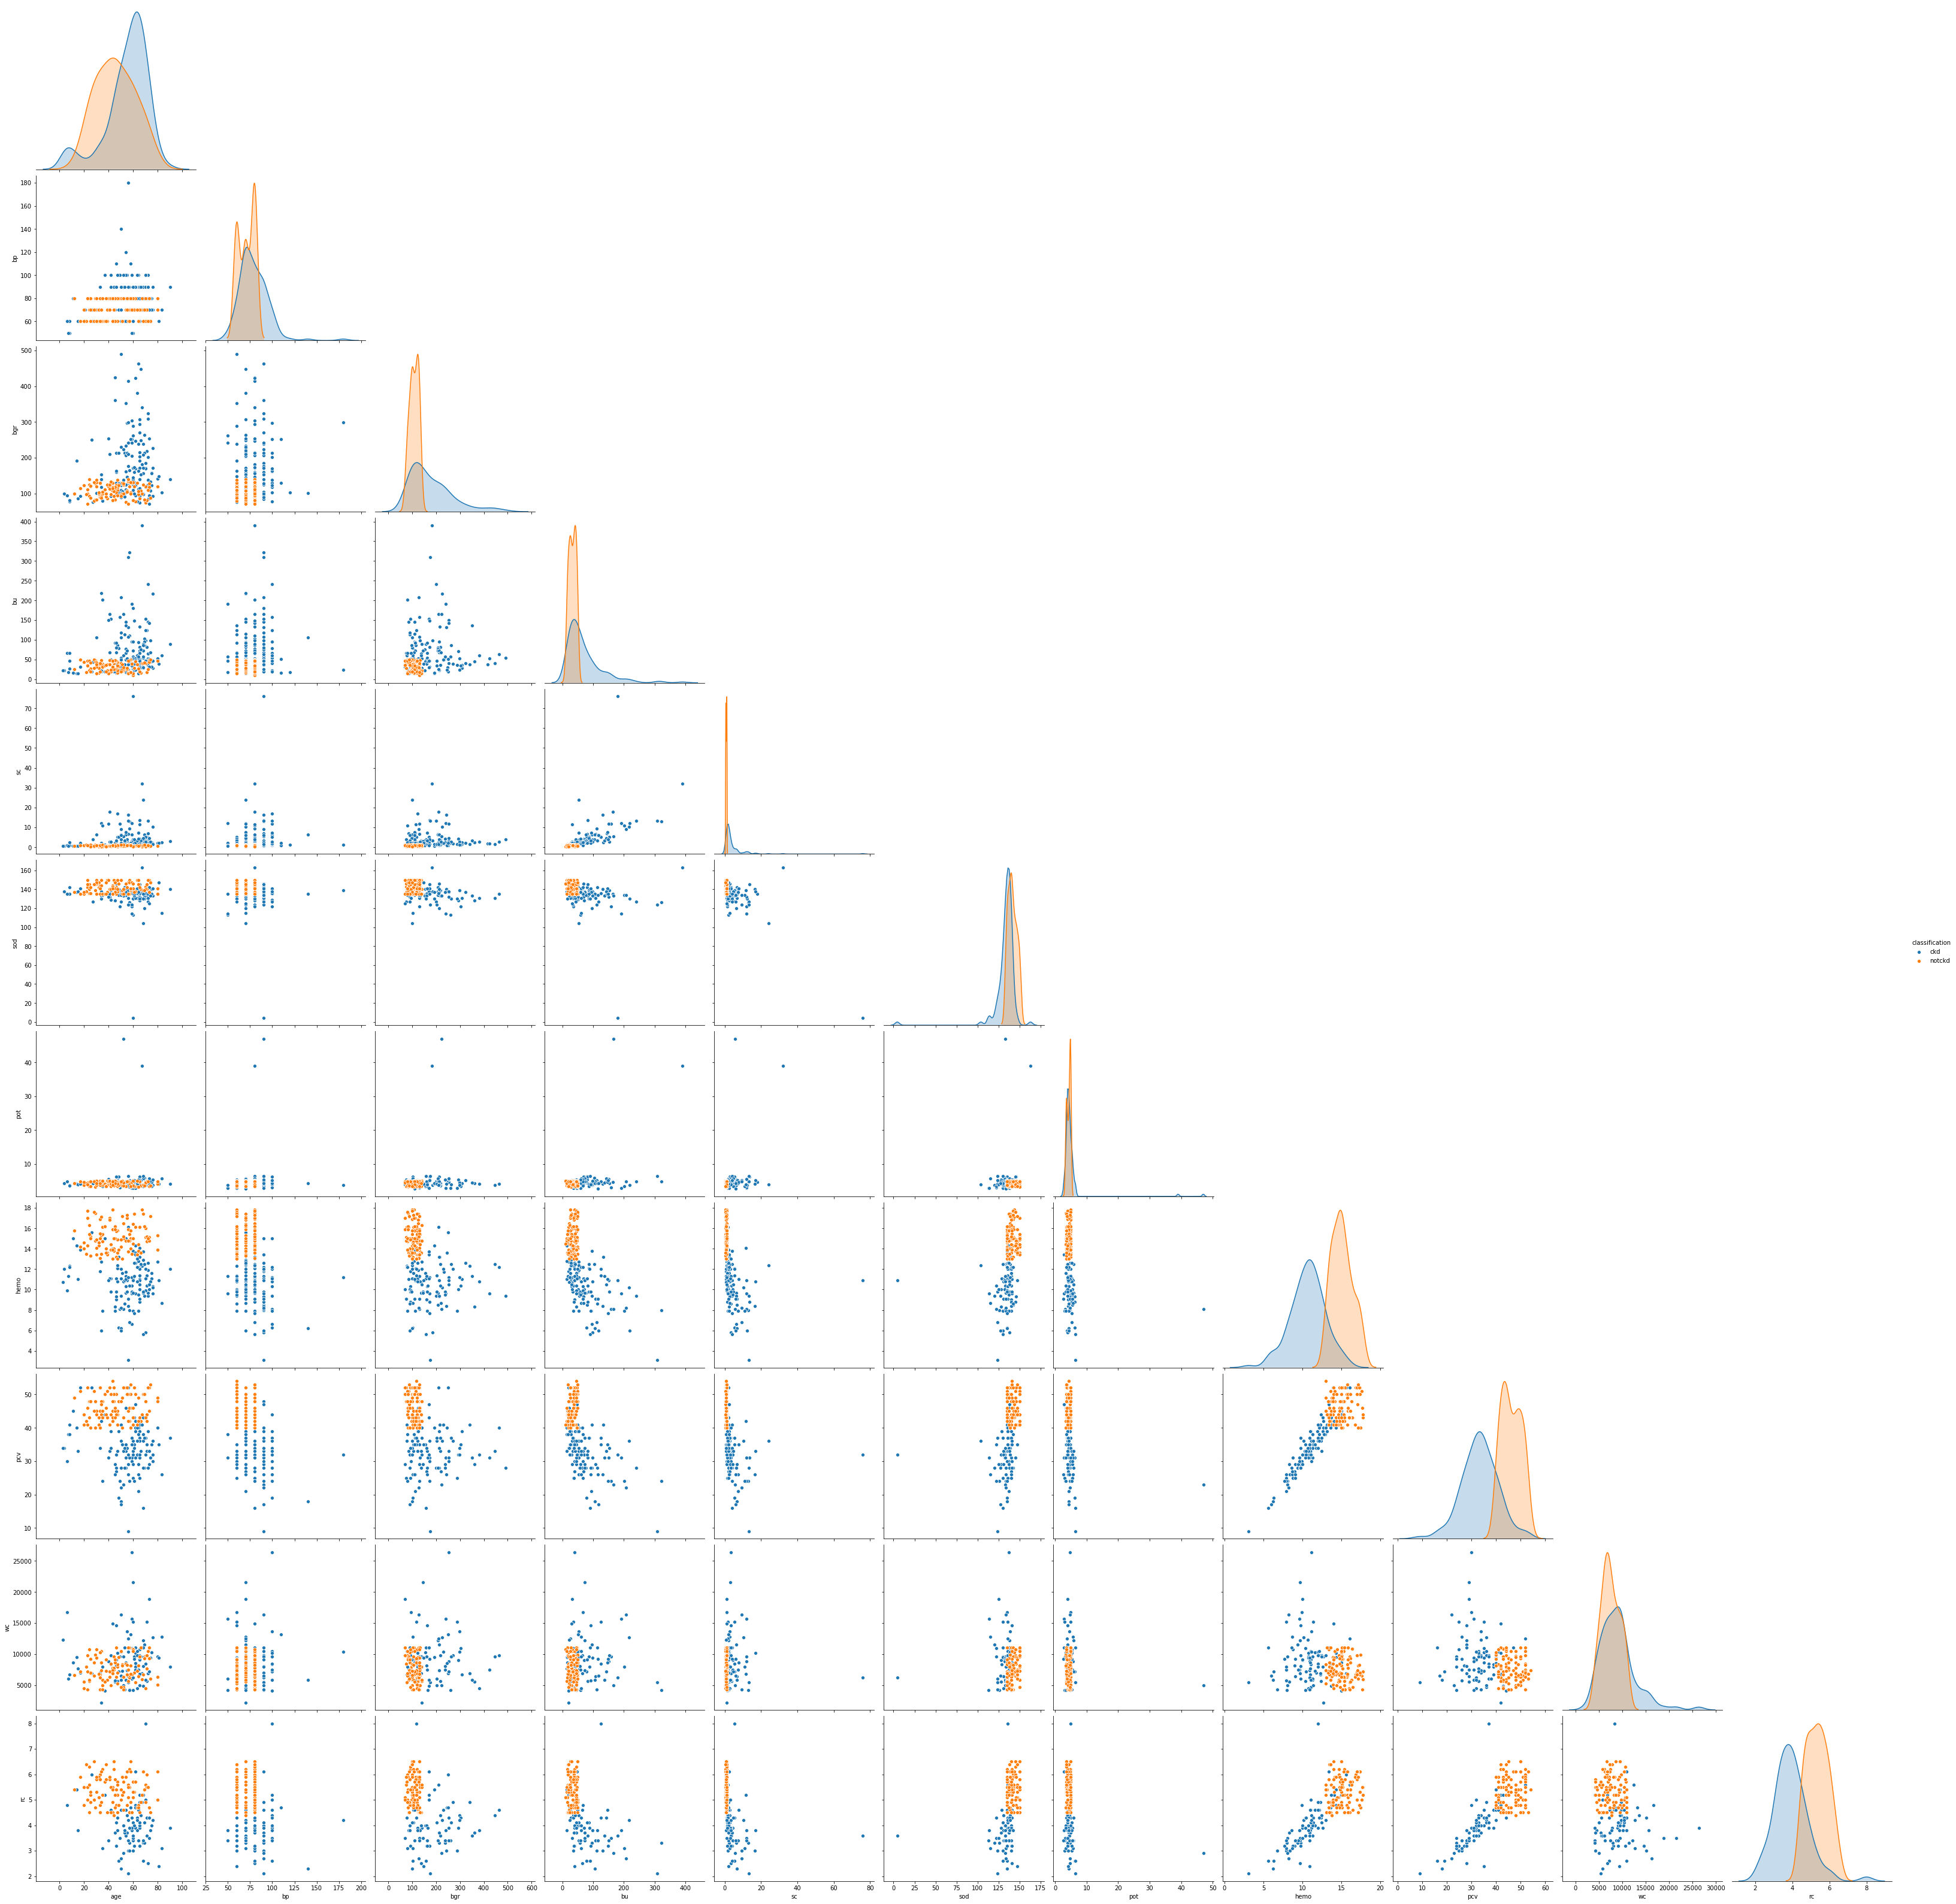

In [67]:
# Dropping discrete numeric variables and Dependent variable from Pairplot 
sns.pairplot(data = df.drop(['id','su','al','sg'], axis = 1), 
             hue = 'classification', 
             corner = True, height = 4)

Some observations -
- Linear relation between hemo and pcv. Lower PCV values -10-40 tend to lead to ckd.
- For **hemo also the lower value below 10 leads to ckd. (assumed by us earlier, normal range hemo - above 10)**
- For pot and sod there is not clear separation of ckd.
-  Not clear about sc, need more details on it
- For blood urea the values above 50 indicate presence of ckd
- bgr above 150 indicates ckd. 
- Both very **low and high bp can be causes of ckd**. However high bp is a more prevalent cause
- **Age older people are more susceptible to ckd**, but there are high overlapping also across all age groups.

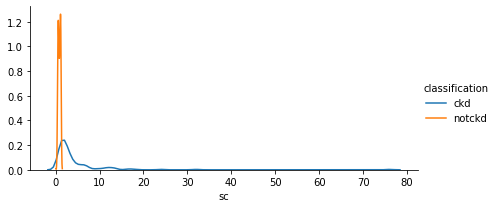

In [68]:
# Relation of sc with Ckd can show some trend
g = sns.FacetGrid(df, hue = 'classification', aspect = 2)
g.map(sns.kdeplot, 'sc')
g.add_legend()

For sc , there were **many unusal values** as also noted earler. So we checked it separately.
All values above 4 tend to show ckd. So **outlier treatment** can be easily done for this variable by **capping **the values.


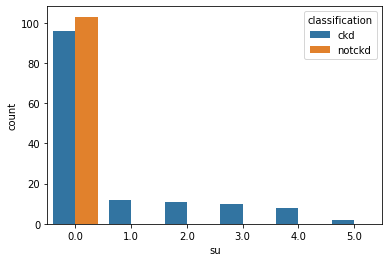

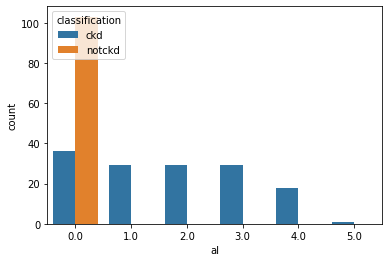

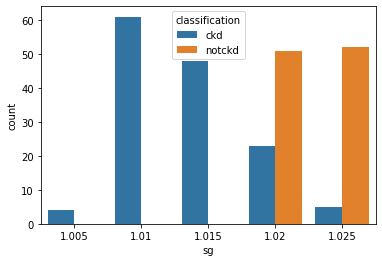

In [69]:
# Plotting discrete variable with classification
var = ['su','al','sg']
for var in df[var].columns:
  plt.subplots(1,1)
  sns.countplot(var, hue = 'classification', data = df)

- Level above 0 of sugar (su) is a symptom of ckd.
- Level above 0 of AL indicate ckd
- 1.005, 1.01, 1.015 indicate presence of ckd. With values of 1.02 and 1.025, less chances of belonging to ckd category.

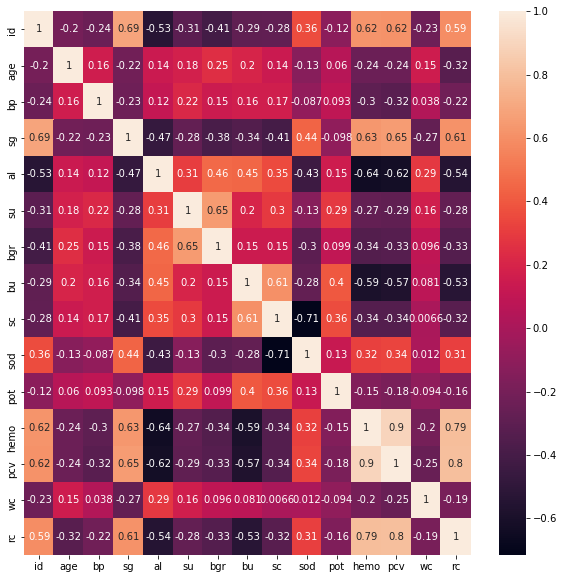

In [70]:
# Correlation Matrix
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

Observations - 
- High correlation between **Pcv and hemo(**as seen by their linear relation)
- Not that high correlation among other variables.
- **bgr and su** have a high corr of 0.65 as also assumed by us earlier
- sodium and serum C has a negative correlation of 0.71
- We made some earlier assumption about rc, rbc , hemo being correlated. Since corr() only takes
numeric variables **bold text** - so we cannot confirm those relations from here. 
- Also relation between bgr and dm could not be confirmed.


Calculating Spearman correlation also, as we have some ordinal variables. So to see their relation in terms of spearman would make more sense.

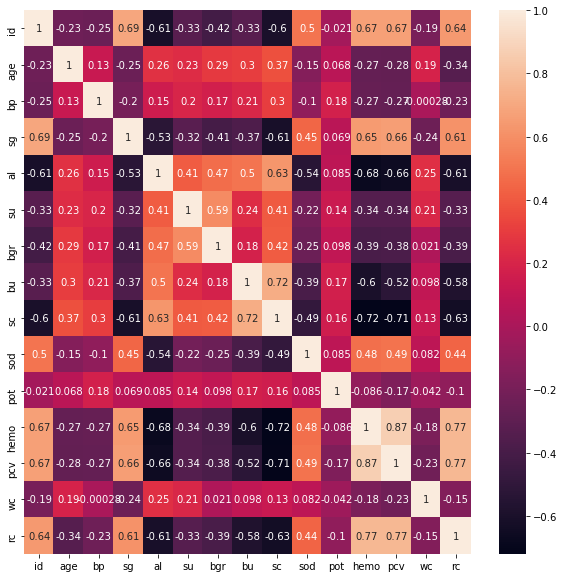

In [71]:
# Spearman Correlation 
plt.figure(figsize = (10,10))
sns.heatmap(df.select_dtypes(exclude = 'object').corr(method = 'spearman'), annot = True)

### Data PreProcessing

Missing Values Treatment

In [72]:
# Count of Missing Values
df.isnull().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 78
rc                 94
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

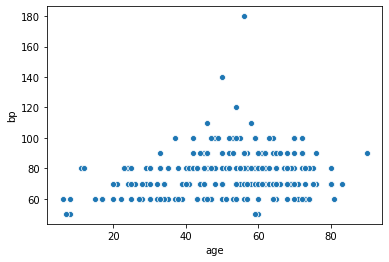

In [73]:
# Scatter of age with bp
sns.scatterplot(x = 'age', y = 'bp', data = df)

In [74]:
df_m = df.copy()
df_m = df_m.drop(['id'], axis = 1)

In [75]:
for col in df_m.columns:
  if df_m[col].dtypes == 'object':
    df_m[col] = df_m[col].fillna(2)


for col in df_m.columns:
  if df_m[col].dtypes != 'object':
    df_m[col] = df_m[col].fillna(999)

In [76]:
df_m.rbc = df_m.rbc.replace({'normal':0, 'abnormal':1})
df_m.pc = df_m.pc.replace({'normal':0, 'abnormal' : 1})
df_m.pcc = df_m.pcc.replace({'notpresent':0, 'present' : 1})
df_m.ba = df_m.ba.replace({'notpresent':0, 'present' : 1})
df_m.htn = df_m.htn.replace({'no':0,'yes' : 1})
df_m.dm = df_m.dm.replace({'no': 0,'yes' : 1})
df_m.cad = df_m.cad.replace({'no':0,'yes' : 1})
df_m.appet = df_m.appet.replace({'good':0,'poor' : 1})
df_m.pe = df_m.pe.replace({'no':0,'yes' : 1})
df_m.ane = df_m.ane.replace({'no':0,'yes' : 1})
df_m.classification = df_m.classification.replace({'notckd':0,'ckd' : 1})

In [77]:
#Imptration for age
x_train = df_m[df_m.age != 999].drop(['age'], axis = 1)
y_train = df_m['age'][df_m.age != 999]
x_test = df_m[df_m.age == 999].drop(['age'], axis = 1)
y_test = df_m['age'][df_m.age == 999]

In [78]:
x_test

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
81,90.0,999.000,999.0,999.0,2,2,0,0,207.0,80.0,...,999.0,999.0,999.0,1,1,0,0,0,1,1
91,60.0,1.015,3.0,0.0,1,1,0,0,999.0,34.0,...,33.0,999.0,999.0,0,0,0,0,0,0,1
95,70.0,1.020,0.0,0.0,2,2,0,0,219.0,36.0,...,37.0,9800.0,4.4,0,0,0,0,0,0,1
247,70.0,1.010,0.0,2.0,2,0,0,0,220.0,68.0,...,27.0,999.0,999.0,1,1,0,0,0,1,1
257,70.0,1.010,3.0,0.0,0,0,0,0,110.0,115.0,...,26.0,9200.0,3.4,1,1,0,1,0,0,1


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 100, max_features = 10, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))


0.8845109256012323

In [80]:
# imp = pd.Series(model.feature_importances_)
# imp.index = x_train.columns
# imp.sort_values(ascending = False)

In [81]:
model.predict(x_test)

array([57.77, 34.68, 56.52, 57.25, 57.53])

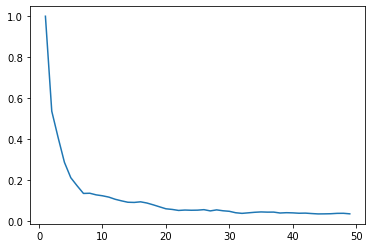

In [82]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,50,1):
  rf = KNeighborsRegressor(n_neighbors= k)
  model2 = rf.fit(x_train, y_train)
  np.sqrt(mean_squared_error(y_train, model2.predict(x_train)))
  score.append(r2_score(y_train, model2.predict(x_train)))


plt.plot(range(1,50,1), score)

In [83]:
# Filling age value from Random Forest Regressor model values
df.age.fillna({81 : 57, 91: 36, 95: 53, 247: 57, 257: 56}, 
              axis = 0, inplace = True)

In [84]:
# Filling missing value of bp. We saw no particular variable had good correlation with bp.
# Highest was pcv with a -0.32 value. So it would be better if we use Regressor as we did for age

x_train = df_m[df_m.bp != 999].drop(['bp'], axis = 1)
y_train = df_m['bp'][df_m.bp != 999]
x_test = df_m[df_m.bp == 999].drop(['bp'], axis = 1)
y_test = df_m['bp'][df_m.bp == 999]

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 50, max_features = 10, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8638519850449191

In [86]:
model.predict(x_test)

array([72.8, 70.4, 72. , 65.8, 71.2, 79.2, 79.8, 76. , 69.2])

In [87]:
df['bp'] = df['bp'].fillna({38 : 71, 89: 71, 101: 73, 169: 67, 183 : 74, 209: 81, 
                            246: 74, 258: 76, 274: 66}
                , axis = 0)


Filling htn, dm , cad missing values. They are categorical and have only one missing value. So we can use any simplified approach to fill them. Most probably fill with mode.

Seeing the row with missing value of dm

In [88]:
df[df.dm.isnull()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
180,288,56.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,11000.0,5.1,NaN,NaN,NaN,good,no,no,notckd


- Seeing the data, we can see that this is the row with htn, dm, cad missing value.

- We can see that this person is not ckd , so there are more chances of him being not having hypertension, coronary disease, Diabetes (As we see in categorical bar plots from above)

- Also the blood sugar random (bgr) = 70, which is a normal value. So dm should take 'no' as a value.

Replacing with 'no' (which is the mode) for these three variables

In [89]:
df['htn'].fillna(df.htn.mode()[0], inplace = True)
df['cad'].fillna(df.cad.mode()[0], inplace = True)
df['dm'].fillna(df.dm.mode()[0], inplace = True)

In [90]:
df[df.dm.isnull()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


We had earlier seen that the five columns (sg, al, su, rbc, pc) have missing values for the same observations(through rbc and pc have have missing values in larger number of observations). 

We can also create a new column - with binary values 1 to mark these observations to create missing value significance and impute then with simple methods. However if we are able to impute with reasonable certainty then we need not create such a column

In [91]:
# Concurrence of missing values
df[df.su.isnull()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
9,245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,19.0,7200.0,2.6,yes,no,yes,poor,no,no,ckd
15,194,80.0,70.0,1.010,2.0,NaN,NaN,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
26,59,59.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
37,81,45.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,29.0,5500.0,3.7,yes,yes,no,good,no,no,ckd
41,208,67.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,41.0,6900.0,4.9,yes,yes,no,good,no,yes,ckd
49,228,60.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,no,ckd
57,238,72.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
60,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28.0,6900.0,2.5,yes,yes,no,poor,no,yes,ckd


Imputation of su
As we saw above by eda, that su have a relation with dm (diabetes) and bgr(blood glucose random).
Also su and bgr have a correlation of 0.65 which points towards a positive relation. So we woul be using these two variables for imputation.



In [92]:
x_train = df_m[['bgr','dm']][df_m.su != 999]
y_train = df_m['su'][df_m.su != 999]
x_test = df_m[['bgr','dm']][df_m.su == 999]
y_test = df_m['su'][df_m.su == 999]

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8056910763912876

In [94]:
model.predict(x_test)

array([0.02      , 0.        , 0.        , 0.63990476, 0.63990476,
       1.62      , 2.52      , 0.        , 0.06      , 0.24      ,
       0.16561047, 3.1       , 2.8       , 0.46      , 0.        ,
       2.78085714, 0.63990476, 0.        , 0.63990476, 0.        ,
       0.        , 0.2       , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.48      ,
       0.        , 0.        , 0.63990476, 0.42      , 1.26566667,
       1.62      , 0.        , 0.        ])

In [95]:
import pandas as pd
series = pd.Series(model.predict(x_test))
series.index = x_test.index
series = np.round(series)
df2 = series
df_joint = pd.concat([x_test, df2], axis = 1)
df_joint = df_joint.rename(columns = {df_joint.columns[2] : 'su'})

In [96]:
df_joint.su.value_counts()

0.0    26
1.0     6
3.0     4
2.0     2
Name: su, dtype: int64

In [97]:
df.loc[df.su.isnull(), 'su'] = df_joint.loc[:,'su']

In [98]:
# Values of Sugar Column after Imputation
df.su.value_counts()

0.0    225
1.0     18
3.0     14
2.0     13
4.0      8
5.0      2
Name: su, dtype: int64

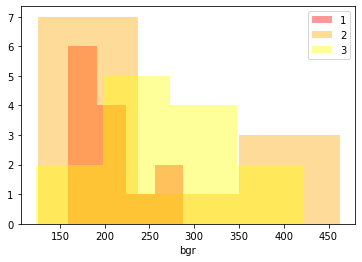

In [99]:
# We can see that for values greater than 140 , the bgr is taking 1 , 2, 3 as status. So

plt.subplots(1,1)
# sns.distplot(df['bgr'][df.su == 0], kde = False, label = 0, color = 'Blue')
sns.distplot(df['bgr'][df.su == 1], kde = False, label = 1, color = 'Red')
sns.distplot(df['bgr'][df.su == 2], kde = False, label = 2, color = 'Orange')
sns.distplot(df['bgr'][df.su == 3], kde = False, label = 3, color = 'Yellow')
# sns.distplot(df['bgr'][df.su == 4], kde = False)
plt.legend()

Imputing Value of Al

In [100]:
df.al.isnull().sum()

35

sc, hemo, pcv, rc have strong correlation with al variables as we checked from above correlation table. So we can use this relation to impute the values.

In [101]:
# Creating train and test split for al variable
x_train = df_m[['rc','pcv','hemo','sc']][df_m.al != 999]
y_train = df_m['al'][df_m.al != 999]
x_test = df_m[['rc','pcv','hemo','sc']][df_m.al == 999]
y_test = df_m['al'][df_m.al == 999]

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.853815088095165

In [103]:
series = pd.Series(model.predict(x_test))
series.index = x_test.index
series = np.round(series)
df2 = series
df_joint = pd.concat([x_test, df2], axis = 1)
df_joint = df_joint.rename(columns = {df_joint.columns[4] : 'al'})
df.loc[df.al.isnull(), 'al'] = df_joint.loc[:,'al']

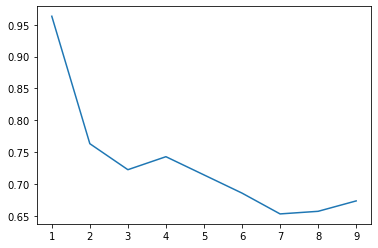

In [104]:
# Imputation tried using KNN - FAILED
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
x_train_scaled = StandardScaler().fit_transform(x_train)
score = []
for k in range(1,10,1):
  rf = KNeighborsClassifier(n_neighbors= k)
  model2 = rf.fit(x_train_scaled, y_train)
  score.append(accuracy_score(y_train, model2.predict(x_train_scaled)))


plt.plot(range(1,10,1), score)

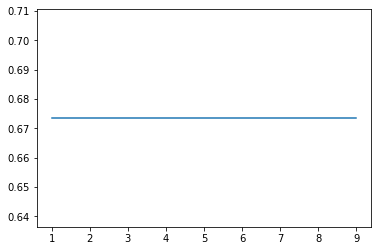

In [105]:
# Imputation using KNN IMPUTER - Failed
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
x_train_scaled = StandardScaler().fit_transform(x_train)
score = []
for k in range(1,10,1):
  model2 = KNNImputer(n_neighbors = k, weights = 'distance')
  model2 = rf.fit(x_train_scaled, y_train)
  score.append(accuracy_score(y_train, model2.predict(x_train_scaled)))


plt.plot(range(1,10,1), score)

Imputation for SG

In [106]:
df.sg.isnull().sum()

36

In [107]:
df.sg.value_counts()

1.020    74
1.010    61
1.025    57
1.015    48
1.005     4
Name: sg, dtype: int64

In [108]:
# PCV and Hemo, rc and sod have high corelation with this variable


# Creating train and test split for al variable
x_train = df_m[['rc','pcv','hemo','sc']][df_m.sg != 999]
y_train = df_m['sg'][df_m.sg != 999]
x_test = df_m[['rc','pcv','hemo','sc']][df_m.sg == 999]
y_test = df_m['sg'][df_m.sg == 999]

Both sg and al have high correlation with same variable, 
they their own correlation is not that high

In [109]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8810554560592643

In [110]:
a = list(np.round(model.predict(x_test),3))
a = [round(round(b/0.005)*0.005,3) for b in a]

In [111]:
# Imputing the values
a = pd.Series(a)
a.index = x_test.index
df_joint = pd.concat([x_test, a], axis = 1)
df_joint = df_joint.rename(columns = {df_joint.columns[4] : 'sg'})
df.loc[df.sg.isnull(), 'sg'] = df_joint.loc[:,'sg']

Imputing values of sc

In [112]:
df.sc.isnull().sum()

12

In [113]:
# Replacing with mode
df['sc'].fillna(df['sc'].mode()[0], inplace = True)

Filling Values of pc and pcc. These two are related, so using their values to impute

In [114]:
df.pc.isnull().sum()

50

In [115]:
observed = pd.crosstab(df['pcc'], df['pc'])

In [116]:
# Calculating CramerV
from scipy.stats import chi2_contingency
chi_stats = chi2_contingency(observed)[0]
n = np.sum(observed).sum()
dof = np.min([observed.shape[0],observed.shape[1]]) - 1 
cramerv = np.sqrt(chi_stats/(n * dof))
cramerv

0.448188019284342

In [117]:
# Removing the over approximation in CramerV Statistics
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
  

cramers_v(df['pcc'], df['pc'])

0.44420808508518167

Interesting to see that CramerV is showing only moderate association even though bar plots showed strong relation between two, also can be understood by definition.

PCC value is available for all nan value of PC, except 1. 

In [118]:
# Imputing the missing values of pc as per pcc
df['pc'][((df.pcc == 'notpresent') & (df.pc.isnull()))] = 'normal'
df['pc'][((df.pcc == 'present') & (df.pc.isnull()))] = 'abnormal'

In [119]:
# One imputation of pc is left, as pcc also has a null value there.
df[df.pc.isnull()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
133,290,54.0,70.0,1.02,0.0,0.0,NaN,NaN,NaN,NaN,...,52.0,8400.0,5.9,no,no,no,good,no,no,notckd


Seeing that pc(pus cell) presenece is an indication of chronic kidney disease. So in above observation, status is notckd, so it should be normal pc and no present pcc.

In [120]:
df['pc'][df.pc.isnull()] = 'normal'

Imputing Value of PCC - Using values of PC

In [121]:
df[df.pcc.isnull()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
38,316,35.0,71.0,1.02,0.0,0.0,normal,normal,NaN,NaN,...,48.0,5000.0,5.2,no,no,no,good,no,no,notckd
133,290,54.0,70.0,1.02,0.0,0.0,NaN,normal,NaN,NaN,...,52.0,8400.0,5.9,no,no,no,good,no,no,notckd
189,300,45.0,60.0,1.02,0.0,0.0,normal,normal,NaN,NaN,...,43.0,9200.0,5.8,no,no,no,good,no,no,notckd
234,328,28.0,70.0,1.02,0.0,0.0,normal,normal,NaN,NaN,...,45.0,8600.0,6.5,no,no,no,good,no,no,notckd


In [122]:
# Imputing with not present
df.loc[df.pcc.isnull(),'pcc'] = 'notpresent'

Imputing PCV 

All three rc, pcv, hemo are highly correlated. So we need to impute one using some other variables and then using this variable, impute the other two

We should first impute the variable that has highest correlation with other variables.

Impute pcv using - sc , al, sg.

In [123]:
# Creating train and test split for al variable
x_train = df[['sc','al','sg']][~df.pcv.isnull()]
y_train = df['pcv'][~df.pcv.isnull()]
x_test = df[['sc','al','sg']][df.pcv.isnull()]
y_test = df['pcv'][df.pcv.isnull()]

In [124]:
# Running Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 51, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8536650845464028

In [125]:
model.predict(x_test)

array([36.05882353, 32.62091503, 40.2745098 , 38.70098039, 39.37254902,
       30.07843137, 45.93084662, 40.7254902 , 32.87007224, 33.4745098 ,
       33.29411765, 38.70098039, 32.74509804, 38.65916828, 45.75179918,
       32.39215686, 33.4745098 , 41.78431373, 33.88235294, 32.2745098 ,
       29.03921569, 35.3355615 , 36.21848739, 28.99346405, 33.71895425,
       34.52941176, 32.96078431, 37.64052288, 37.16569818, 39.54411765,
       38.6875817 , 36.99019608, 35.20261438, 30.05882353, 34.31372549,
       43.44117647, 37.93932462, 36.01960784, 41.79411765, 33.70588235,
       29.7745098 , 33.69934641, 38.70098039, 31.35294118, 44.71202148,
       27.19346405, 30.08823529, 39.44281046, 47.77300738, 30.88235294,
       44.28154373])

In [126]:
# Imputing the values
a = pd.Series(model.predict(x_test))
a.index = x_test.index
df_joint = pd.concat([x_test, a], axis = 1)
df_joint = df_joint.rename(columns = {df_joint.columns[3] : 'pcv'})
df.loc[df.pcv.isnull(), 'pcv'] = df_joint.loc[:,'pcv']

In [127]:
df.groupby(['sc','sg','al'])['pcv'].agg(['mean','median'])

mean     median
sc   sg    al                       
0.4  1.025 0.0  41.000000  41.000000
0.5  1.020 0.0  46.000000  46.000000
     1.025 0.0  45.000000  44.000000
0.6  1.020 0.0  48.428571  49.000000
           1.0  34.000000  34.000000
...                   ...        ...
16.9 1.010 4.0  33.000000  33.000000
18.0 1.015 1.0  33.294118  33.294118
24.0 1.010 0.0  36.000000  36.000000
32.0 1.010 1.0  33.705882  33.705882
76.0 1.010 3.0  32.000000  32.000000

[167 rows x 2 columns]

Imputation of Hemo - Highlu Correlated with PCV.

In [128]:
# Creating train and test split for Hemo variable
x_train = df[['pcv']][~df.hemo.isnull()]
y_train = df['hemo'][~df.hemo.isnull()]
x_test = df[['pcv']][df.hemo.isnull()]
y_test = df['hemo'][df.hemo.isnull()]

In [129]:
# Running Random Forest Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = LinearRegression()
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.7761821786158529

In [130]:
model.coef_, model.intercept_

(array([0.2927413]), 1.170799298348216)

In [131]:
# Imputing the values
a = pd.Series(model.predict(x_test))
a.index = df[df.hemo.isnull()].index
df_joint = pd.DataFrame(a, columns= ['hemo'])
df.loc[df.hemo.isnull(), 'hemo'] = df_joint.loc[:,'hemo']

Imputation of RC

In [132]:
# Creating train and test split for Hemo variable
x_train = df[['pcv','hemo']][~df.rc.isnull()]
y_train = df['rc'][~df.rc.isnull()]
x_test = df[['pcv','hemo']][df.rc.isnull()]
y_test = df['rc'][df.rc.isnull()]

In [133]:
# Running Linear Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = LinearRegression()
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.663737591933895

In [134]:
# Running Random Forest Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8951159659028352

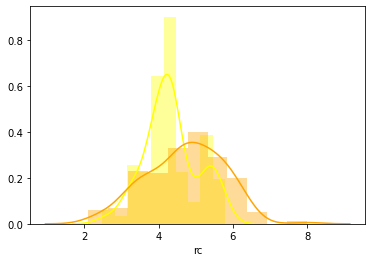

In [135]:
plt.subplots(1,1)
sns.distplot(pd.Series(model.predict(x_test)), color = 'Yellow')
sns.distplot(df.rc, color = 'Orange')

In [136]:
# Imputing the values
a = pd.Series(model.predict(x_test))
a.index = df[df.rc.isnull()].index
df_joint = pd.DataFrame(a, columns= ['rc'])
df.loc[df.rc.isnull(), 'rc'] = df_joint.loc[:,'rc']

Imputation of rbc

In [137]:
df.rbc.value_counts(dropna = False)

normal      144
NaN         107
abnormal     29
Name: rbc, dtype: int64

RBC has a direct relation with rc - that shows numerical value of red blood cell counts. So if the range of rc is in normal range, rbc will take normal as status or otherwise. This can be confirmed by boxplot.

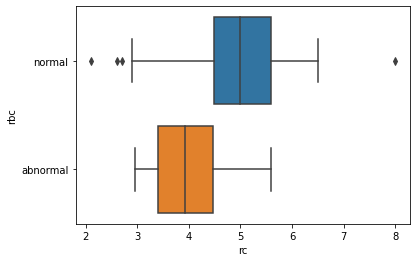

In [138]:
sns.boxplot('rc', 'rbc', data = df)

We can see a separation in the concentrated part for the two categories of rbc.

However there is a issue, that rc itself has a lot of null values. So we have to think of some other way.

In [139]:
# Calculating PointBiserial Corelation bwteen rbc anc rc

from scipy.stats import pointbiserialr
df_pbr = df[~((df.rc.isnull()) | (df.rbc.isnull()))]
df_pbr.rbc = df_pbr.rbc.replace({'normal' : 0, 'abnormal' : 1})
stats = pointbiserialr(df_pbr['rbc'], df_pbr['rc'])
stats

PointbiserialrResult(correlation=-0.35646312649261214, pvalue=1.4821459046441927e-06)

Point Biserial is showing weak Correlation between the dichatamous and Continuous variable

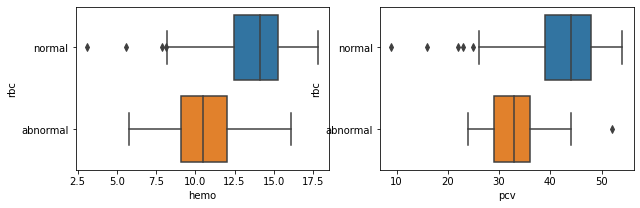

In [140]:
fig, ax = plt.subplots(1,2, figsize = (10,3))
sns.boxplot(df['hemo'], df['rbc'], ax = ax[0])
sns.boxplot(df['pcv'], df['rbc'], ax = ax[1])

There is good separation also the two category of rbc for hemo and pcv.

In [141]:
from scipy.stats import pointbiserialr
df_pbr = df[~((df.hemo.isnull()) | (df.rbc.isnull()))]
df_pbr.rbc = df_pbr.rbc.replace({'normal' : 0, 'abnormal' : 1})
stats = pointbiserialr(df_pbr['hemo'], df_pbr['rbc'])
stats

PointbiserialrResult(correlation=-0.40481944526795915, pvalue=3.3081007913719754e-08)

In [142]:
from scipy.stats import pointbiserialr
df_pbr = df[~((df.pcv.isnull()) | (df.rbc.isnull()))]
df_pbr.rbc = df_pbr.rbc.replace({'normal' : 0, 'abnormal' : 1})
stats = pointbiserialr(df_pbr['rbc'], df_pbr['pcv'])
stats

PointbiserialrResult(correlation=-0.3903810674765343, pvalue=1.0984052019200252e-07)

Seeing from above graphs and Correlation, it would be better if we use pcv and hemo values for filling of rbc values

Conditions , hemo > 12 and pcv > 38, rbc takes normal value. And for hemo < 12 and pcv < 38, it takes abnormal value.

In [143]:
df[['rbc','hemo','pcv']][df.rbc.isnull()].isnull().all(axis = 1).sum()

0

In [144]:
df_new = df[['rbc','hemo','pcv']]
df_new.pcv_1 = np.where(df.pcv > 38, 0, 1)
df_new.hemo_1 = np.where(df.hemo > 12, 0, 1)
pd.crosstab(df_new.pcv_1, df_new.hemo_1, values = df_new.rbc, aggfunc = 'count')

col_0,0,1
row_0,,
0,113,1
1,3,56


In [145]:
df['rbc'][df.rbc.isnull()] = np.where(df.hemo < 12 , 'abnormal', 'normal')

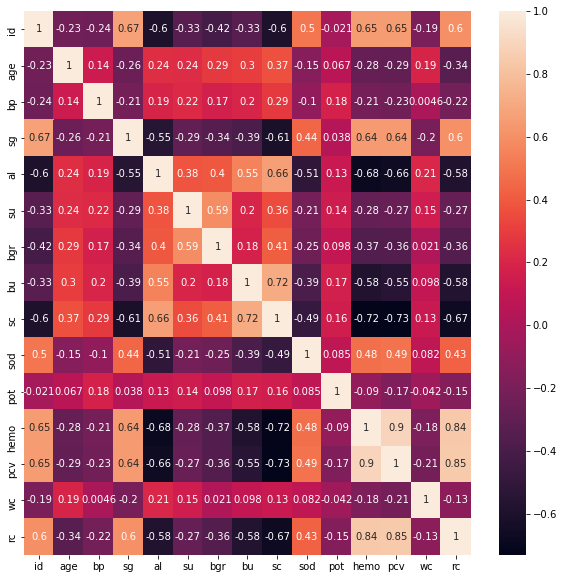

In [146]:
# Spearman Correlation 
plt.figure(figsize = (10,10))
sns.heatmap(df.select_dtypes(exclude = 'object').corr(method = 'spearman'), annot = True)

Imputing Bgr

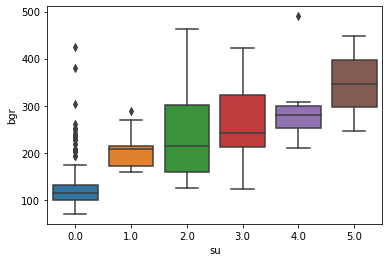

In [147]:
sns.boxplot('su', 'bgr', data = df)

Using su(sugar) for imputing bgr value

In [148]:
# Creating train and test split for Bgr variable
x_train = df[['su','al','sc']][~df.bgr.isnull()]
y_train = df['bgr'][~df.bgr.isnull()]
x_test = df[['su','al','sc']][df.bgr.isnull()]
y_test = df['bgr'][df.bgr.isnull()]

In [149]:
# Running Random Forest Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8677399509823485

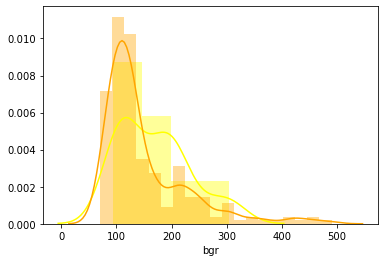

In [150]:
plt.subplots(1,1)
sns.distplot(pd.Series(model.predict(x_test)), color = 'Yellow')
sns.distplot(df.bgr, color = 'Orange')

In [151]:
# Imputing the values
a = pd.Series(model.predict(x_test))
a.index = df[df.bgr.isnull()].index
df_joint = pd.DataFrame(a, columns= ['bgr'])
df.loc[df.bgr.isnull(), 'bgr'] = df_joint.loc[:,'bgr']

Impuying Values of ba

In [152]:
df[df.ba.isnull()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
38,316,35.0,71.0,1.02,0.0,0.0,normal,normal,notpresent,NaN,...,48.0,5000.0,5.2,no,no,no,good,no,no,notckd
133,290,54.0,70.0,1.02,0.0,0.0,normal,normal,notpresent,NaN,...,52.0,8400.0,5.9,no,no,no,good,no,no,notckd
189,300,45.0,60.0,1.02,0.0,0.0,normal,normal,notpresent,NaN,...,43.0,9200.0,5.8,no,no,no,good,no,no,notckd
234,328,28.0,70.0,1.02,0.0,0.0,normal,normal,notpresent,NaN,...,45.0,8600.0,6.5,no,no,no,good,no,no,notckd


All four cases are with good health stats like good appetite, normal potassium and sodium, no heart disease. So it is better to fill bacteria as not present as presence of bacteria is a symptoym of chronic kidney disease.

In [153]:
df['classification'][df.ba == 'present'].value_counts()

ckd    16
Name: classification, dtype: int64

In [154]:
df.loc[df.ba.isnull(),'ba'] = 'notpresent'

Imputing bu (blood urea) values

bu has high correlation with sc

In [155]:
# Creating train and test split for Hemo variable
x_train = df[['pcv','al','sc']][~df.bu.isnull()]
y_train = df['bu'][~df.bu.isnull()]
x_test = df[['pcv','al','sc']][df.bu.isnull()]
y_test = df['bu'][df.bu.isnull()]

In [156]:
# Running Random Forest Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.9316836097869031

In [157]:
# Imputing the values
a = pd.Series(model.predict(x_test))
a.index = df[df.bu.isnull()].index
df_joint = pd.DataFrame(a, columns= ['bu'])
df.loc[df.bu.isnull(), 'bu'] = df_joint.loc[:,'bu']

Imputing Potassium

This variables do not have high correlation with any other variable. So imputing them with KNN Regressor

Encoding df Categorical Variable

In [158]:
df.rbc = df.rbc.replace({'normal':0, 'abnormal':1})
df.pc = df.pc.replace({'normal':0, 'abnormal' : 1})
df.pcc = df.pcc.replace({'notpresent':0, 'present' : 1})
df.ba = df.ba.replace({'notpresent':0, 'present' : 1})
df.htn = df.htn.replace({'no':0,'yes' : 1})
df.dm = df.dm.replace({'no': 0,'yes' : 1})
df.cad = df.cad.replace({'no':0,'yes' : 1})
df.appet = df.appet.replace({'good':0,'poor' : 1})
df.pe = df.pe.replace({'no':0,'yes' : 1})
df.ane = df.ane.replace({'no':0,'yes' : 1})
df.classification = df.classification.replace({'notckd':0,'ckd' : 1})

In [159]:
# Creating train and test split for  variable
x_train = df.drop(['sod','wc','pot'], axis = 1)[~df.pot.isnull()]
y_train = df['pot'][~df.pot.isnull()]
x_test = df.drop(['sod','wc','pot'], axis = 1)[df.pot.isnull()]
y_test = df['pot'][df.pot.isnull()]

In [160]:
y_train.shape

(212,)

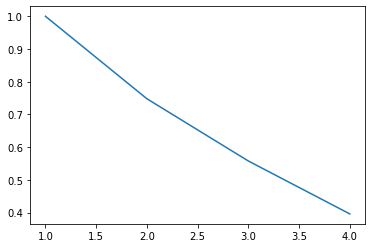

In [161]:
# Imputation using KNN Regressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)
score = []
for k in range(1,5,1):
  model2 = KNeighborsRegressor(n_neighbors = k)
  model2.fit(x_train_scaled, y_train)
  np.sqrt(mean_squared_error(y_train, model2.predict(x_train_scaled)))
  score.append(r2_score(y_train, model2.predict(x_train_scaled)))


plt.plot(range(1,5,1), score)
  

In [162]:
model2 = KNeighborsRegressor(n_neighbors = 2)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)
model2.fit(x_train_scaled, y_train)
a = pd.Series(model2.predict(x_test_scaled))
a.index = df[df.pot.isnull()].index
df_joint = pd.DataFrame(a, columns= ['pot'])
df.loc[df.pot.isnull(), 'pot'] = df_joint.loc[:,'pot']

Imputing WC (White Blood Cells) - Again no Significant Correlation with other variables

In [163]:
# Creating train and test split for Bgr variable
x_train = df.drop(['sod','wc'], axis = 1)[~df.wc.isnull()]
y_train = df['wc'][~df.wc.isnull()]
x_test = df.drop(['sod','wc'], axis = 1)[df.wc.isnull()]
y_test = df['wc'][df.wc.isnull()]

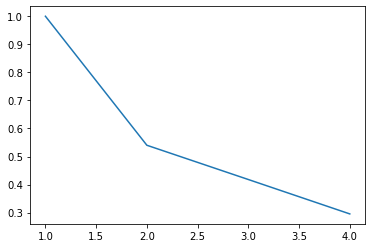

In [164]:
# Imputation using KNN Regressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)
score = []
for k in range(1,5,1):
  model2 = KNeighborsRegressor(n_neighbors = k)
  model2.fit(x_train_scaled, y_train)
  np.sqrt(mean_squared_error(y_train, model2.predict(x_train_scaled)))
  score.append(r2_score(y_train, model2.predict(x_train_scaled)))


plt.plot(range(1,5,1), score)
  

In [165]:
# Running Random Forest Regressor Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
model = rf.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
r2_score(y_train, model.predict(x_train))

0.8663694174776477

In [166]:
a = pd.Series(model.predict(x_test))
a.index = df[df.wc.isnull()].index
df_joint = pd.DataFrame(a, columns= ['wc'])
df.loc[df.wc.isnull(), 'wc'] = df_joint.loc[:,'wc']

Imputing sod value using KNN Imputer

In [167]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df_filled = imputer.fit_transform(df)
df_filled = pd.DataFrame(df_filled, columns = df.columns)
df = df_filled.copy()

In [168]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### Outliers Treatment

id columns is irrelevant.

Age has outliers but it has no unnatural value. So we will not be treating its Outliers. However we can bin it, so that age Outliers effect are reduced. But still for time being we will leave it as it is, due to presence of no large Outliers.

Sg, Al, Su have discrete Vaues - so  they do not have any Ouliers. They have only count/frequency which does not signify any number range.



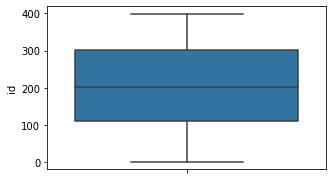

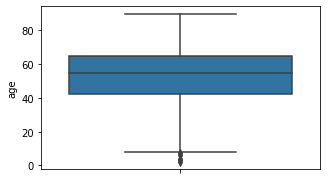

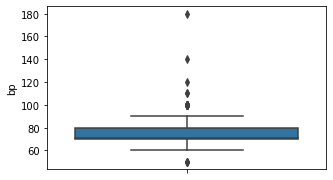

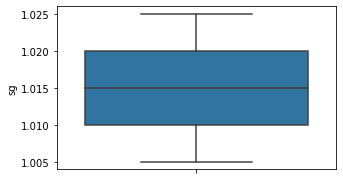

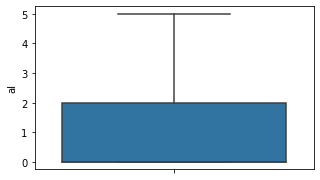

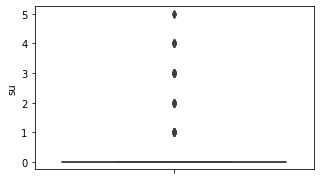

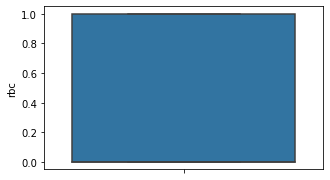

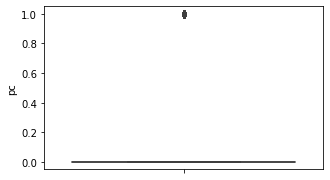

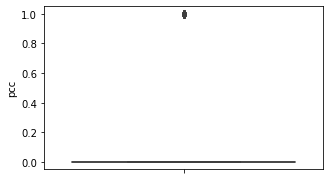

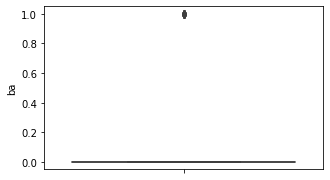

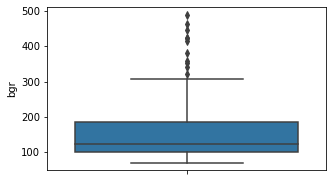

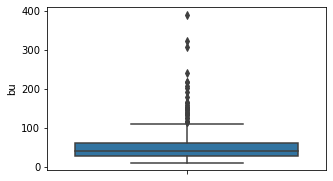

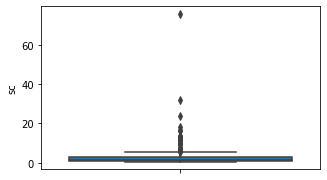

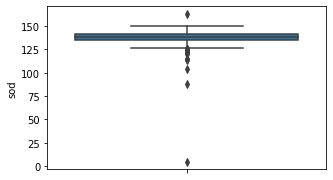

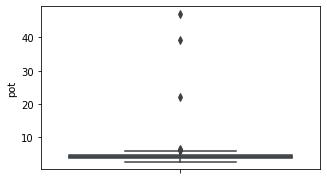

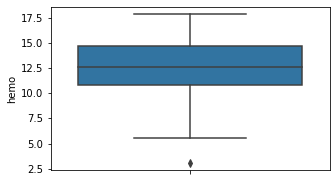

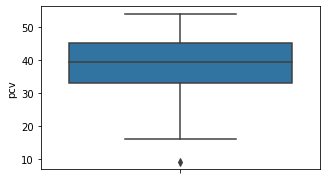

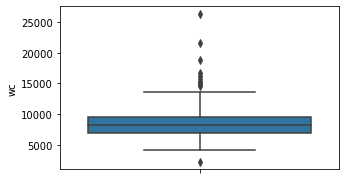

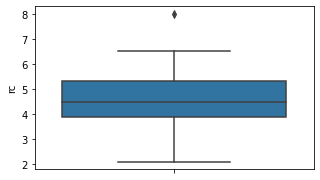

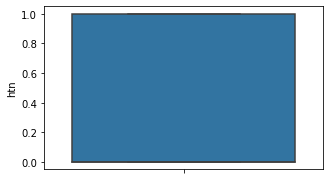

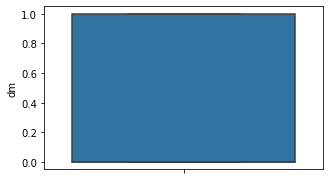

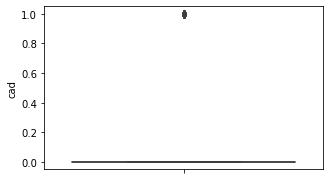

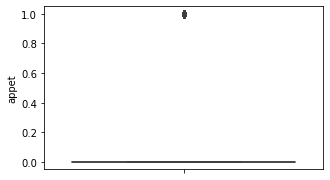

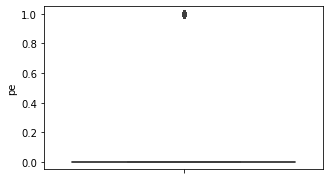

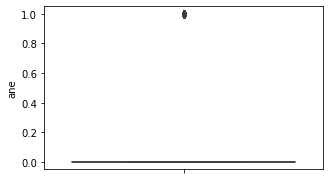

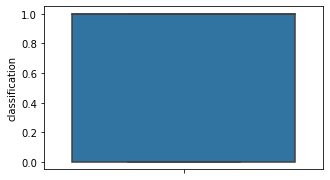

In [169]:
# EDA Numeric Variable

for col in df.columns:
  fig, ax = plt.subplots(1,1, figsize = (5,3))
  sns.boxplot(col, data = df, orient = 'v')

Treating bp variable Outliers. They are actually true values, so it is better to bin/discreticize bp to show different levels.

Using DecisionTreeClassifier as Discritiser as it benefits - 
- Creating monotonic relation with target variable
- Decreases Entropy within groups
- Treats Outliers

In [170]:
# from feature_engine.discretisers import DecisionTreeDiscretiser
# from sklearn.model_selection import train_test_split
# disc = DecisionTreeDiscretiser(cv = 5, scoring = 'accuracy',
#                                       variables = ['bp'], param_grid = {'max_depth' : [1,2,3]}
#                                       , regression = False, random_state = 1, )

# X_train, X_test, y_train, y_test =  train_test_split(
#             df.drop(['id','classification'], axis = 1),
#             df['classification'], test_size=0.3, random_state=0)

# disc.fit(X_train, y_train)
# df.disc_bp = disc.transform(df['bp'])

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(
            df[['bp']], df['classification'], test_size=0.3, random_state=0)

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)
X_train['bp_tree']=tree_model.predict_proba(X_train)[:,1] 
X_train.head(10)

,bp,bp_tree
246,74.0,0.572917
213,60.0,0.572917
71,100.0,1.000000
154,90.0,1.000000
220,70.0,0.572917
184,60.0,0.572917
269,80.0,0.396552
179,80.0,0.396552
33,60.0,0.572917
83,120.0,1.000000


In [172]:
df['bp_o'] = tree_model.predict_proba(df[['bp']])[:,1]

Treating Outliers of bgr and bu

We will use Transformation here - as these have a continuous stream of Outliers. So capping should not be opt as this will restrict the natural value of the variables.

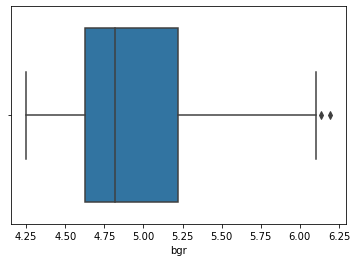

In [173]:
df['bgr_o'] = np.log(df['bgr']) 
sns.boxplot(np.log(df['bgr']))

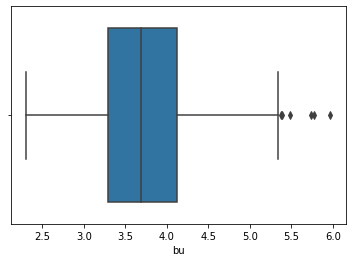

In [174]:
df['bu_o'] = np.log(df['bu'])
sns.boxplot(np.log(df['bu']))

In [175]:
# df['sc'].idxmax()
# df_sc = df['sc'].copy()
# df_sc[df_sc.index == 253]
# iqr = (1.5*(df_sc.quantile(0.75) - df_sc.quantile(0.25)) + df_sc.quantile(0.75))

Using KMeans Discretizer for sc - as this way most of Outliers can be grouped. Most abnormal will be grouped in one, the Ouliers in between in other group.

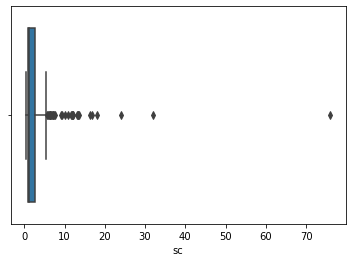

In [176]:
sns.boxplot(df['sc'])

In [177]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
discretizer.fit(df[['sc']])
discretizer.transform(df[['sc']])
pd.concat((pd.DataFrame(discretizer.transform(df[['sc']]), index = df.index, columns = ['sc_disc']), df['sc']), 
          axis = 1).groupby(['sc_disc'])['sc'].agg({'max','min'})
# pd.concat(pd.Series(discretizer.transform(df[['sc']])), df['sc'])

,max,min
sc_disc,,
0.0,3.0,0.4
1.0,7.5,3.2
2.0,18.0,9.2
3.0,32.0,24.0
4.0,76.0,76.0


We can see how well has our Discretizer performed.

In [178]:
df['sc_o'] = discretizer.transform(df[['sc']])

Same we will perform KMeansDiscretization with sodium as it as same distribution like sc

In [179]:
disodretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
disodretizer.fit(df[['sod']])
disodretizer.transform(df[['sod']])
pd.concat((pd.DataFrame(disodretizer.transform(df[['sod']]), index = df.index, columns = ['sod_disod']), df['sod']), 
          axis = 1).groupby(['sod_disod'])['sod'].agg({'max','min'})
df['sod_o'] = disodretizer.transform(df[['sod']])

Hemo and PCV Has single Outlier value and those also not that abnormal or deviant. So we will not be treating these variables - as the value is just above upper bound of Outliers.

Potassium has 3 Outliers - we will be capping these values

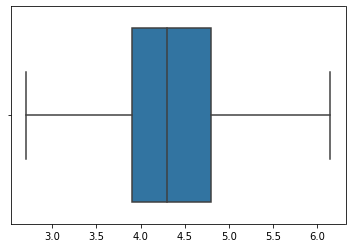

In [180]:
ub_pot = (1.5*(df['pot'].quantile(0.75) - df['pot'].quantile(0.25)) + df['pot'].quantile(0.75))
sns.boxplot(np.where(df['pot'] > ub_pot, ub_pot, df['pot']))
df['pot_o'] =  np.where(df['pot'] > ub_pot, ub_pot, df['pot'])

Treating the Outliers of WC - Through Transformation.
Box - Cox Transformation will help in making the distribution more normal and also decreasing the effects of Outliers.

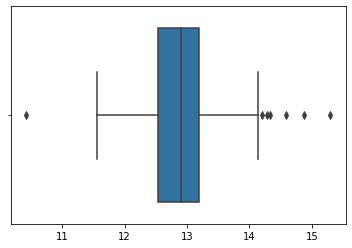

In [181]:
from scipy import stats
sns.boxplot(stats.boxcox(df['wc'])[0])
df['wc_o'] = stats.boxcox(df['wc'])[0]

### Feature Selection and Engineering

We Know that some varibles like - Hemo, PCV, rc have high correlation. So we can 
try to perform PCA on these. These three also are continuous also. 
We also have treated their Outliers. So we should try what the results and then see should 
we proceed with PCA results or not.

In [182]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_pca = df[['rc','hemo','pcv']]
scale = StandardScaler()
df_pca_scaled = scale.fit_transform(df_pca)
pca = PCA(n_components = 3)
array_pca = pca.fit_transform(df_pca_scaled)
df_pca_done = pd.DataFrame(data = array_pca, columns = ['pc1','pc2','pc3'])
pca.explained_variance_ratio_

array([0.89053114, 0.07186223, 0.03760663])

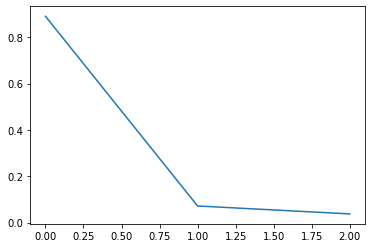

In [183]:
plt.plot(range(3),pca.explained_variance_ratio_)

We can see that we can bring 90% of variance in one Principal Component. However, we also need to see how significant these variables are. This will help us to decide whether we want to keep original variables or the reduced Principal Component

In [184]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification', 'bp_o', 'bgr_o', 'bu_o', 'sc_o',
       'sod_o', 'pot_o', 'wc_o'],
      dtype='object')

Above we see that we have all the variables, with Outlier Treatment and also Without outlier Treatment. This will help us to see whether our treatment helped to increase importance of that variable in prediction.

  Feature Importance as per Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf.fit(df.drop(['id','classification'], axis = 1), df.classification)
imp = pd.Series(rf.feature_importances_)
imp.index = df.drop(['id','classification'], axis = 1).columns
imp.sort_values(ascending = False)

hemo     0.166970
al       0.134148
pcv      0.131800
sg       0.126682
rc       0.095266
sc       0.068431
bgr      0.053698
bgr_o    0.045406
bu_o     0.030000
dm       0.029761
htn      0.019456
sod_o    0.014625
su       0.009701
bp_o     0.009083
age      0.008413
bu       0.008254
sod      0.008219
pe       0.006670
rbc      0.006446
appet    0.005093
bp       0.004721
sc_o     0.004683
pot      0.002813
pc       0.002696
wc       0.002373
pot_o    0.001750
wc_o     0.001497
pcc      0.001346
cad      0.000000
ba       0.000000
ane      0.000000
dtype: float64

From above we can see that the importance of most of the variables after transformation(var_o) has increased, except for sc . We need to work on this as we do not want to reduce importance of any variable.

For correlation variables, we can see that hemo is the most important, followed by pcv and rc. So we can drop pcv and rc to reduce collinerity.

Checking feature importance by Lasso Regression

In [186]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['classification', 'id'], axis=1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((196, 31), (84, 31))

In [187]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [188]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver = 'liblinear'))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [189]:
selected_feat = df.drop(['id','classification'], axis = 1).columns[(sel_.get_support())]
selected_feat

Index(['bp', 'sg', 'al', 'su', 'hemo', 'pcv', 'rc', 'dm', 'pe', 'bp_o',
       'bgr_o', 'sod_o'],
      dtype='object')

In [190]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 31
selected features: 12
features with coefficients shrank to zero: 19


The Lasso Regression shrinked the coefficients of 19 features to zero. That is a significant reduction. But we need to see how well these features perform in term of Prediction results also.

Feature Selection by Shuffling method

In [191]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['classification', 'id'], axis=1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((196, 31), (84, 31))

In [192]:
# Building a Basic Random Forest Model to record base ROC-AUC score
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(
    n_estimators=100, max_depth = 2, random_state=1)
 
rf.fit(X_train, y_train)
 
# print roc-auc in train and testing sets
print('train auc score: ',
      roc_auc_score(y_train, (rf.predict_proba(X_train)[:, 1])))
print('test auc score: ',
      roc_auc_score(y_test, (rf.predict_proba(X_test)[:, 1])))

train auc score:  1.0
test auc score:  1.0


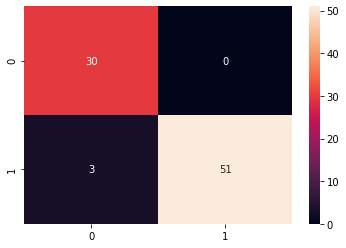

In [193]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot = True)

In [194]:
# overall train roc-auc: using all the features
train_auc = roc_auc_score(y_train, (rf.predict_proba(X_train)[:, 1]))
 
# dictionary to capture the features and the drop in auc that they
# cause when shuffled
feature_dict = {}
 
# selection  logic
for feature in X_train.columns:
    X_train_c = X_train.copy()
    
    # shuffle individual feature
    X_train_c[feature] = X_train_c[feature].sample(frac=1, random_state = 1).reset_index(
        drop=True)
    
    # make prediction with shuffled feature and calculate roc-auc
    shuff_auc = roc_auc_score(y_train,
                              (rf.predict_proba(X_train_c.fillna(0)))[:, 1])
    
    # save the drop in roc-auc
    feature_dict[feature] = (train_auc - shuff_auc)

In [195]:
feature_importance = pd.Series(feature_dict).reset_index()
feature_importance.columns = ['feature', 'auc_drop']
feature_importance.auc_drop = np.round(feature_importance.auc_drop, 5)
feature_importance

,feature,auc_drop
0,age,0.00000
1,bp,0.00000
2,sg,0.00011
3,al,0.00000
4,su,0.00000
5,rbc,0.00000
6,pc,0.00000
7,pcc,0.00000
8,ba,0.00000
9,bgr,0.00000


Our shuffling method could not prove anything conclusive.

### Logistics Regression Model

Building model using the Variables we got after treating Missing Values and Outliers

In [196]:
# Dividing into Training and Test set 
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['wc','bgr','bu','sod','sc','pot','bp','classification'], axis = 1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((196, 25), (84, 25))

We will not be standardizing here, as we wont be able to make sense of the coefficients, due to presence of Multicollinearity.

In [197]:
from sklearn.metrics import classification_report
LogR = LogisticRegression(random_state = 1, 
                            verbose = 1)
LogR.fit(X_train, y_train)
y_train_pred = LogR.predict(X_train)
y_test_pred = LogR.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00       120

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        54

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Test Data')

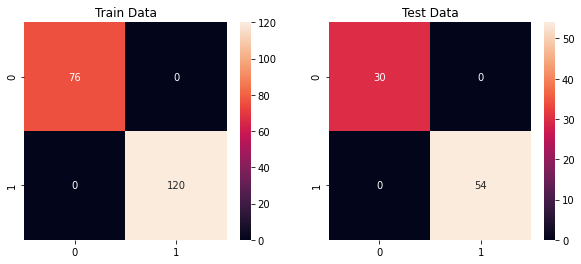

In [198]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = 'd' ,ax = ax[0])
ax[0].set_title('Train Data')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'd', ax = ax[1])
ax[1].set_title('Test Data')

Now we will Logistic Regression to understand the coefficient Significance. We will also need to do some check before that.

Before building the model, we need to complete some required checks - especially of Multicollinearity.

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [200]:
X = df.drop(['classification','sc','bp','bgr','bu','pot','sod','wc','id'], axis = 1)
calc_vif(X)

,variables,VIF
0,age,14.101991
1,sg,1390.260032
2,al,4.298996
3,su,2.309114
4,rbc,2.719096
5,pc,2.393756
6,pcc,1.673039
7,ba,1.497698
8,hemo,136.654946
9,pcv,144.625024


Though many variables are showing high collinearity. But 5 variables - sg, bgr_o, wc_o, hemo, pcv. These have too high values of VIF

Dropping sg variable - as it is showing highest value. And running VIF test again.

In [201]:
X = df.drop(['classification','sc','bp','bgr','bu','pot','sod','wc','id','sg'], axis = 1)
calc_vif(X)

,variables,VIF
0,age,13.958270
1,al,4.179397
2,su,1.998285
3,rbc,2.596668
4,pc,2.379421
5,pcc,1.662579
6,ba,1.486351
7,hemo,134.695068
8,pcv,139.441090
9,rc,89.380531


Still many variables have too high values of VIF. Dropping wc_o(as it has highest value for VIF), and also pcv and rc - we already seen they have high correlation with hemo.


In [202]:
X = df.drop(['classification','sc','bp','bgr','bu','pot','sod',
             'wc','id','rc','sg','pcv','wc_o', 'bgr_o', 'pot_o','sod_o','bu_o','bp_o'], axis = 1)
calc_vif(X)

,variables,VIF
0,age,12.468810
1,al,3.657476
2,su,1.620639
3,rbc,2.030760
4,pc,2.132694
5,pcc,1.619894
6,ba,1.460400
7,hemo,8.056287
8,htn,3.694565
9,dm,3.676283


I tried dropping variables iteratively and then see how much the VIF value decreased. By going in a iterative and dropping variable with highest VIF - Many variables have to be dropped.

Variables dropped - 'rc','sg','pcv','wc_o', 'bgr_o', 'pot_o','sod_o','bu_o','bp_o'

Building Logistics Regression Model - with scaled variables to understand significance of variables


In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['classification','sc','bp','bgr','bu','pot','sod',
             'wc','id','rc','sg','pcv','wc_o', 'bgr_o', 'pot_o','sod_o','bu_o','bp_o'], axis = 1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape


((196, 15), (84, 15))

In [204]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [205]:
from sklearn.metrics import classification_report
LogR = LogisticRegression(random_state = 1, 
                            verbose = 1)
LogR.fit(X_train_scaled, y_train)
y_train_pred = LogR.predict(X_train_scaled)
y_test_pred = LogR.predict(X_test_scaled)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        76
         1.0       1.00      0.97      0.98       120

    accuracy                           0.98       196
   macro avg       0.97      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        30
         1.0       1.00      0.94      0.97        54

    accuracy                           0.96        84
   macro avg       0.95      0.97      0.96        84
weighted avg       0.97      0.96      0.96        84



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Test Data')

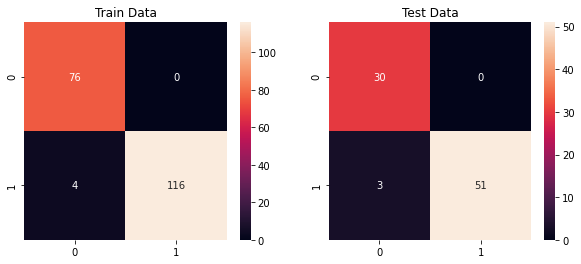

In [206]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = 'd' ,ax = ax[0])
ax[0].set_title('Train Data')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'd', ax = ax[1])
ax[1].set_title('Test Data')

The Original Logistics Regression gave us a accuracy of 1 and even after decreasing our multicollinarity , the accuracy has not been substantially hit. 
We still are getting a accuracy of 0.95 with test set

In [207]:
feature_coef = pd.Series(np.exp(LogR.coef_[0]))
feature_coef.index = X_train.columns
feature_coef.sort_values(ascending = False)

al       3.571862
dm       3.183245
rbc      2.813558
htn      2.533224
su       2.507822
sc_o     1.792306
pc       1.646818
pe       1.581185
appet    1.285006
age      1.223456
ane      1.214334
pcc      1.124194
ba       1.080318
cad      1.033165
hemo     0.102843
dtype: float64

The data gives us a indication of predictive power of the coefficients.
Al, dm, htn are the most important predictors for class = 1 (Chronic kidney Disease). They incline the odds in favour of Class 1.
Increase in Hemo changes the prediction more in favour of class = 0 (No Chronic Disease)

In [208]:
# # Dividing into Training and Test set 
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['id','wc','bgr','bu','sod','sc','pot','bp','classification'], axis = 1),
#     df['classification'],
#     test_size=0.3,
#     random_state=0)
# X_train.shape, X_test.shape
# # Scaling before Ridge Regression
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# from sklearn.metrics import classification_report
# modelRR = LogisticRegression(penalty = 'l2', C = 1, random_state = 1, 
#                              solver = 'liblinear', verbose = 1)
# modelRR.fit(X_train_scaled, y_train)
# y_train_pred = modelRR.predict(X_train_scaled)
# y_test_pred = modelRR.predict(X_test_scaled)
# print('\n')
# print(classification_report(y_train, y_train_pred))
# print(classification_report(y_test, y_test_pred))

LASSO REGRESSION MODEL

Building Model using Lasso Regression, as it will help to understand Coefficient Significance and also help in dropping less significant variables

In [209]:
# Dividing into Training and Test set 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['classification'], axis = 1),
    df['classification'],
    test_size=0.3,
    random_state=0)

# Scaling before Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [210]:
from sklearn.metrics import classification_report
modelLR = LogisticRegression(penalty = 'l1', C = 1, random_state = 1, 
                             solver = 'liblinear', verbose = 1)
modelLR.fit(X_train_scaled, y_train)
y_train_pred = modelLR.predict(X_train_scaled)
y_test_pred = modelLR.predict(X_test_scaled)
print('\n')
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

[LibLinear]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00       120

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      0.98      0.99        54

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



Text(0.5, 1.0, 'Test Data')

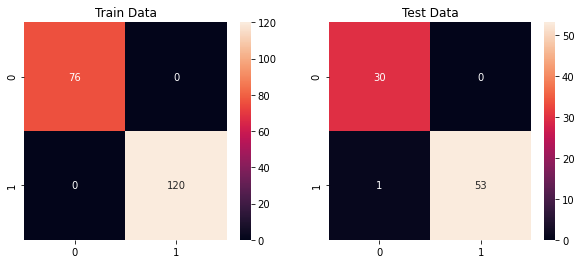

In [211]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = 'd' ,ax = ax[0])
ax[0].set_title('Train Data')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'd', ax = ax[1])
ax[1].set_title('Test Data')

In [212]:
feature_coef = pd.Series(modelLR.coef_[0])
feature_coef.index = X_train.columns
feature_coef.sort_values(ascending = False)

al       0.562668
bp_o     0.479374
dm       0.475831
htn      0.390906
bgr_o    0.123230
wc_o     0.000000
pot      0.000000
su       0.000000
rbc      0.000000
pc       0.000000
pcc      0.000000
ba       0.000000
bgr      0.000000
bu       0.000000
sc       0.000000
sod      0.000000
wc       0.000000
pot_o    0.000000
pcv      0.000000
bp       0.000000
rc       0.000000
cad      0.000000
appet    0.000000
pe       0.000000
ane      0.000000
bu_o     0.000000
sc_o     0.000000
sod_o    0.000000
age      0.000000
hemo    -0.909890
sg      -1.247232
id      -3.511802
dtype: float64

We see that coefficients for a lot of variables changes to 0 and thus we can remove these variables if we want to decrease the complexity of the model, but it will increase the bias error.

In [213]:
feature_coef = pd.Series(modelLR.coef_[0])
feature_coef.index = X_train.columns
np.exp(feature_coef[feature_coef != 0]).sort_values(ascending = False)

al       1.755350
bp_o     1.615063
dm       1.609351
htn      1.478319
bgr_o    1.131144
hemo     0.402568
sg       0.287299
id       0.029843
dtype: float64

Most Important Feature :
- Class 1 Prediction - al, dm, bgr_o
- Class 0 Prediction - sg, hemo

Before building Decision Tree model we will dropped the variables that we had transformed and made more robust. 
For sc we see in terms of Feature selection that sc was more important than sc_o , so we will keep the original variable here.

In [214]:
df = df.drop(['wc','bgr','bu','sod','sc_o','pot','bp','id'], axis = 1)

# Decision Tree Model

In [215]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop(['classification'], axis = 1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape


((196, 24), (84, 24))

In [216]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00       120

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        54

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Feature Importance

In [217]:
imp = pd.Series(data = tree.feature_importances_, index = X_train.columns)
imp.sort_values( ascending = False)

hemo     0.715942
sg       0.242178
su       0.041880
wc_o     0.000000
pot_o    0.000000
al       0.000000
rbc      0.000000
pc       0.000000
pcc      0.000000
ba       0.000000
sc       0.000000
pcv      0.000000
rc       0.000000
htn      0.000000
dm       0.000000
cad      0.000000
appet    0.000000
pe       0.000000
ane      0.000000
bp_o     0.000000
bgr_o    0.000000
bu_o     0.000000
sod_o    0.000000
age      0.000000
dtype: float64

Quite amazing. Only 3 variables are contributiing to division and thus we can understand why we are getting the perfect accuracy for train and test data.

Building Decision Tree Model keeping only the three variables - hemo, sg, su

In [218]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,['sg','su','hemo']],
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((196, 3), (84, 3))

In [219]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00       120

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        54

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



A sassumed - Perfect score

# Random Forest Model

In [220]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop(['classification'], axis = 1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((196, 24), (84, 24))

In [221]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00       120

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      0.98      0.99        54

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



# Naive Bayes 

In [222]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(df.drop(['classification'], axis = 1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((196, 24), (84, 24))

In [223]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        76
         1.0       1.00      0.97      0.98       120

    accuracy                           0.98       196
   macro avg       0.97      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       1.00      0.98      0.99        54

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



# Support Vector Machine

In [224]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(df.drop(['classification'], axis = 1),
    df['classification'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape


((196, 24), (84, 24))

In [225]:
classifier = SVC(kernel = 'linear', random_state = 1)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00       120

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        30
         1.0       1.00      0.96      0.98        54

    accuracy                           0.98        84
   macro avg       0.97      0.98      0.97        84
weighted avg       0.98      0.98      0.98        84



Linear SVM can very well separate the data.

In [226]:
classifier = SVC(kernel = 'poly',degree = 2, random_state = 1)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92        76
         1.0       0.99      0.90      0.94       120

    accuracy                           0.93       196
   macro avg       0.93      0.94      0.93       196
weighted avg       0.94      0.93      0.93       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        30
         1.0       1.00      0.87      0.93        54

    accuracy                           0.92        84
   macro avg       0.91      0.94      0.91        84
weighted avg       0.93      0.92      0.92        84



In [227]:
classifier = SVC(kernel = 'rbf', random_state = 1)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
print('\n')
print('Classification Report for Train Set\n')
print(classification_report(y_train, y_train_pred))
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_test_pred))



Classification Report for Train Set

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        76
         1.0       0.97      0.93      0.95       120

    accuracy                           0.94       196
   macro avg       0.93      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196

Classification Report for Test Set

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        30
         1.0       0.96      0.83      0.89        54

    accuracy                           0.87        84
   macro avg       0.86      0.88      0.86        84
weighted avg       0.89      0.87      0.87        84



We can see that rbf and polynimal SVM perform poor than Linear SVM.